## 1. File description 




## 0. Import module and setting notebook preferences

### 0.1 Import modules

In [1]:
import src.useful as su
import src.labelling as sl
import src.image as si
import src.model as sm 
import src.webscraping as sw
import src.viz as sv

import sqlite3
import pandas as pd 
import numpy as np
from scipy.stats import boxcox

import nltk 
from nltk.corpus import stopwords
from collections import Counter


import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
import dtale
# from autoviz import data_cleaning_suggestions



from sklearn.preprocessing import OneHotEncoder

import re
import os
from pandarallel import pandarallel

pandarallel.initialize()
sl.Mypandas.initialize()

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


### 0.2 Notebook preferences

In [2]:
# Setting pandas options
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,}'.format

# Setting plotly as dark
pio.templates.default = "plotly_dark"
plotly_kwargs = {'category_orders': {"label": [0, 1, 2, 3]},
                 'color_discrete_sequence': ['#1f77b4', '#EF553B', '#00CC96', '#FECB52']}

# Creating SQL database to store all the data for the project
database = "data/main_database.sqlite"
con = sqlite3.connect(database)

# Setting path to export viz
viz_dir = '/Users/marclamy/Desktop/code/viz/instabot/'

### 0.3 Load and consolidate the data into a single table


In [3]:
df_main = sl.load_main()
df_labels = sl.load_labels()
 
df_main = df_main.merge(df_labels, how='left', on='username')

# either fillna, either dropna, depending on the use case, comment/uncomment
# df_main['label'] = df_main['label'].fillna(-1).astype(int)
# df_main['label'] = df_main['label'].astype(str)

df_main = df_main.dropna(subset='label').reset_index(drop=True)
df_main['label'] = df_main['label'].astype(int)
df_main['binary_label'] = df_main['label'].apply(lambda x: 1 if x == 3 else x).astype(int)

# df_main = sl.Mypandas(df_main)


df_main = df_main.drop([col for col in df_main.columns if any([f'posts_{x}' in col for x in ['sum', 'min', 'max', 'avg', 'concat']])], axis=1)

df_main_bu = df_main.copy(deep=True)
df_main.head()

username  \
0       adorable-jade-beluga   
1  hysterical-glistening-bee   
2         little-crafty-mink   
3        gentle-crimson-wolf   
4       festive-uppish-leech   

                                           biography  \
0  ⁣⁣28 🇩🇪 🇪🇸 \ncapricorn 🐐 \ndallas tx📍outside 🍾...   
1  “moving at a pace slow for some but fast for o...   
2                                          new page.   
3                                         • 9/26 💘 •   
4                                       stay mad bum   

                                  biography_wo_emoji biography_emoji  \
0  ⁣⁣28   \ncapricorn  \ndallas txoutside \n“her ...        📍🇩🇪🚫🍾🇪🇸🐐   
1  “moving at a pace slow for some but fast for o...             ⬇️🚨   
2                                          new page.                   
3                                          • 9/26  •               💘   
4                                       stay mad bum                   

   biography_emoji_count  biography_emoji_count_distinct  follow_count  \
0                    6.0                             6.0       3,164.0   
1                    2.0                             2.0         114.0   
2                    0.0                             0.0         204.0   
3                    1.0                             1.0         211.0   
4                    0.0                             0.0           0.0   

   follower_count pronouns           domain  \
0         4,676.0     None  mintyswraps.com   
1            52.0     None      youtube.com   
2           422.0     None             None   
3           586.0     None             None   
4             0.0     None             None   

                                             comment  \
0                      bucks finna have a repeat 🏆 👀   
1                       crazy eyes got moves lol 🤣🤣😭   
2                        flight is gonna be heated 😂   
3  someone forgot to tell the warriors they had a...   
4                      klay is back scary hoursss 🤪🤪   

                                    comment_wo_emoji  comments_likes  \
0                          bucks finna have a repeat             967   
1                           crazy eyes got moves lol            1024   
2                          flight is gonna be heated             711   
3  someone forgot to tell the warriors they had a...             161   
4                         klay is back scary hoursss             166   

  comment_emoji  comment_emoji_count  comment_emoji_count_distinct  \
0            👀🏆                    2                             2   
1            😭🤣                    3                             2   
2             😂                    1                             1   
3             😂                    1                             1   
4             🤪                    2                             1   

   comment_time_difference  post_count  video_count  highlight_reel_count  \
0                       95        76.0          6.0                   8.0   
1                      250         0.0          2.0                   0.0   
2                      310         0.0          0.0                   0.0   
3                      180         6.0          0.0                   0.0   
4                      245         0.0          0.0                   0.0   

   hide_like_and_view_counts  has_guides  has_clips  is_private  \
0                        0.0         0.0        1.0         0.0   
1                        0.0         0.0        1.0         0.0   
2                        1.0         0.0        0.0         1.0   
3                        0.0         0.0        0.0         0.0   
4                        0.0         0.0        0.0         1.0   

   is_embeds_disabled  is_joined_recently  is_professional_account  \
0                 0.0                 0.0                      0.0   
1                 0.0                 0.0                      1.0   
2                 0.0                 0.0                     

In [4]:
os.system('say "error"')

0

In [5]:
# serie = [x for x in enumerate(range(df_main['follow_count'].min() // 100, df_main['follow_count'].max() // 100))]
# serie =

# for value in range()

# serie

### 0.4 Counting labels

In [6]:
unique_comments = df_main.shape[0]
unique_usernames = df_main.drop_duplicates(subset='username').shape[0]

labels = df_main['label'].value_counts()
labels_unique = df_main.drop_duplicates(subset='username')['label'].value_counts()


print(f'{unique_comments = }')
print(f'{unique_usernames = }\n')
print(f'Labels for comment \n{labels}\n')
print(f'Labels unique users \n{labels_unique}\n\n')
print(f'% comments labelled: {sum(labels)/unique_comments:.1%}')
print(f'% users labelled: {sum(labels_unique)/unique_usernames:.1%}')

unique_comments = 30498
unique_usernames = 14574

Labels for comment 
0    18628
1    10927
3      943
Name: label, dtype: int64

Labels unique users 
0    11225
1     2862
3      487
Name: label, dtype: int64


% comments labelled: 100.0%
% users labelled: 100.0%


## 1.0 Quick viz - Move this to part 2 for when the data is clean

### 1.X Pandas profiling

In [7]:
# Generate report of the data
# profile = ProfileReport(df_main, title="Pandas Profiling Report")
# profile.to_file('data/pandas_profiling.html')

In [8]:
df_main.head()

username  \
0       adorable-jade-beluga   
1  hysterical-glistening-bee   
2         little-crafty-mink   
3        gentle-crimson-wolf   
4       festive-uppish-leech   

                                           biography  \
0  ⁣⁣28 🇩🇪 🇪🇸 \ncapricorn 🐐 \ndallas tx📍outside 🍾...   
1  “moving at a pace slow for some but fast for o...   
2                                          new page.   
3                                         • 9/26 💘 •   
4                                       stay mad bum   

                                  biography_wo_emoji biography_emoji  \
0  ⁣⁣28   \ncapricorn  \ndallas txoutside \n“her ...        📍🇩🇪🚫🍾🇪🇸🐐   
1  “moving at a pace slow for some but fast for o...             ⬇️🚨   
2                                          new page.                   
3                                          • 9/26  •               💘   
4                                       stay mad bum                   

   biography_emoji_count  biography_emoji_count_distinct  follow_count  \
0                    6.0                             6.0       3,164.0   
1                    2.0                             2.0         114.0   
2                    0.0                             0.0         204.0   
3                    1.0                             1.0         211.0   
4                    0.0                             0.0           0.0   

   follower_count pronouns           domain  \
0         4,676.0     None  mintyswraps.com   
1            52.0     None      youtube.com   
2           422.0     None             None   
3           586.0     None             None   
4             0.0     None             None   

                                             comment  \
0                      bucks finna have a repeat 🏆 👀   
1                       crazy eyes got moves lol 🤣🤣😭   
2                        flight is gonna be heated 😂   
3  someone forgot to tell the warriors they had a...   
4                      klay is back scary hoursss 🤪🤪   

                                    comment_wo_emoji  comments_likes  \
0                          bucks finna have a repeat             967   
1                           crazy eyes got moves lol            1024   
2                          flight is gonna be heated             711   
3  someone forgot to tell the warriors they had a...             161   
4                         klay is back scary hoursss             166   

  comment_emoji  comment_emoji_count  comment_emoji_count_distinct  \
0            👀🏆                    2                             2   
1            😭🤣                    3                             2   
2             😂                    1                             1   
3             😂                    1                             1   
4             🤪                    2                             1   

   comment_time_difference  post_count  video_count  highlight_reel_count  \
0                       95        76.0          6.0                   8.0   
1                      250         0.0          2.0                   0.0   
2                      310         0.0          0.0                   0.0   
3                      180         6.0          0.0                   0.0   
4                      245         0.0          0.0                   0.0   

   hide_like_and_view_counts  has_guides  has_clips  is_private  \
0                        0.0         0.0        1.0         0.0   
1                        0.0         0.0        1.0         0.0   
2                        1.0         0.0        0.0         1.0   
3                        0.0         0.0        0.0         0.0   
4                        0.0         0.0        0.0         1.0   

   is_embeds_disabled  is_joined_recently  is_professional_account  \
0                 0.0                 0.0                      0.0   
1                 0.0                 0.0                      1.0   
2                 0.0                 0.0                     

### 1.X dtale

In [9]:
# dtale.show(df_main)

### 1.x Autoviz

In [10]:
os.system('say "auto viz done"')

0

## 1.0 Data cleaning and Univariate Analysis

For the following: 
* Clean the column 
    * Remove missing value/add a missing flag column
    * Flag and remove outliers
* Add new features
* Data viz
    * Look at the distribution for each label
    * Look at describe per label 
    * Next to the title, add - Done / - missing markdown
---


Sub groups of 1.0 with: 
* Biography 
    * bio/bio wo emoji 
    * bio emoji count 
* Comment 
    * Comment/wo emoji
    * Comment int cols 
* Follow/er count 
* Domain
* Post/video count 
    * and highlight_reel_count
* Binary
    * hide like and view count 
    * has guides 
    * has clips 
    * is private 
    * is embeds 
    * is joined 
    * is verified
* Professional/business account 
* Posts list
* Dates diff 


In [11]:
df_main['outlier'] = ''
def print_outliers(df, col, threshold=None):
    '''Calculating outliers and flagging them'''
    lower_bound, upper_bound = df.outliers_bound(col)
    df['outlier'] = df.apply(lambda x: x['outlier'] if lower_bound < x[col] < upper_bound else x['outlier'] + ', ' + col, axis=1)
    print(f'Lower bound: {lower_bound} - Upper bound: {upper_bound}\n')
    print(df.query(f'{col} >= @upper_bound').shape[0], 'outliers found\n')

    # Checking outliers per label 
    for label in (0, 1, 3):
        print(f'Label: {label}')
        display(df.query(f'label == {label}')[col].apply(lambda x: lower_bound <= x <= upper_bound).value_counts().reset_index().rename(columns={'index': 'Condition', col: 'Count'}).assign(Percentage=lambda x: (x['Count']/x['Count'].sum()*100).round(1)))
    
    return df

### 1.1 Comments - Done ✅

#### 1.1.0 Gram functions

Creating functions to clean/calculate/show different grams of the comments. Will be reusing them for biography.

In [12]:
def clean_and_tokenize(biographies):
    """
    Given a list of biographies, this function performs the following steps:
    1. Remove unwanted characters from each biography
    2. Tokenize the cleaned text into words
    3. Remove stop words from the tokenized text
    4. Return the filtered list of tokens

    Parameters:
    biographies (list): List of strings representing the biographies

    Returns:
    filtered (list): List of lists of filtered tokens
    """
    # Remove unwanted characters
    cleaned = [re.sub(r'[^\w\s\d]', '', b).lower() for b in biographies]
    # Tokenize the text
    tokenized = [nltk.tokenize.word_tokenize(b) for b in cleaned]
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered = [[w for w in t if w.lower() not in stop_words or w.isdigit()] for t in tokenized]
    return filtered
    

def most_frequent_grams(tokens, grams):
    bigrams = [', '.join(b) for t in tokens for b in list(nltk.ngrams(t, grams))]
    most_frequent = dict(Counter(bigrams))
    return most_frequent


def calculate_grams(df, column, max_gram_degree):
    df_grams = pd.DataFrame(columns=['gram', 'count', 'label', 'gram_degree'])
    for label in (0, 1, 2, 3):
        tokens = clean_and_tokenize(df.query(f'label == {label}')[column])
        for gram in (1, 2, 3, 4):
            top_tokens = most_frequent_grams(tokens, gram)
            # top_tokens = {i:[j] for i, j in top_tokens.items()}
            # df_top_tokens = pd.DataFrame(top_tokens, columns=[f'label_{label}_gram_{gram}', f'label_{label}_count_{gram}'])
            current_df = pd.DataFrame(top_tokens.items(), columns=['gram', 'count'])
            current_df['gram_degree'] = gram
            current_df['label'] = label
            df_grams = pd.concat([df_grams, current_df], axis=0)
    return df_grams


def keep_top_n_grams(df, n):
    df_grams_grouped = df.query('label in (0, 1, 3)').sort_values(by=['label', 'gram_degree', 'count'], ascending=[True, True, False])
    df_grams_grouped['row_number'] = df_grams_grouped.groupby(['label', 'gram_degree']).cumcount() + 1
    grams_to_keep = df_grams_grouped.query('row_number <= @n')['gram'].unique().tolist()
    df = df.query('gram in @grams_to_keep').sort_values(['label', 'gram_degree', 'count'], ascending=[True, True, False])
    return df



def plot_grams(df): 
    for degree in df.gram_degree.unique(): 
        fig = px.bar(
            df.query('gram_degree == @degree'), 
            x='gram', 
            y='count', 
            color='label', 
            # barmode='group', 
            **plotly_kwargs,
            title=f'Most grams by label and degree {degree}')
        fig.update_xaxes(tickangle=-90)
        # fig.update_layout(xaxis={'categoryorder':'total descending'})
        
        display(fig)

#### 1.1.1 Wordcloud

* ????????????????????               Both legit and other bots have the word "first", but not for the same reason. For the legits, its only to be first to comment where for the bots it's the first who read out to them. Let's check the average sentence length where first is in. 

In [13]:
# # Plot wordcloud
# for label in (0, 1, 3):
#     print(f'Label: {label}')
#     wordcloud = WordCloud(width=1800, 
#                           height=1200, 
#                           min_font_size=1, 
#                           max_words=500, 
#                           colormap='tab10')
                          
#     word_list = ' '.join([word for list in df_main.query(f'label == {label}')['comment_wo_emoji'].str.split(' ') for word in list])
#     wordcloud.generate(word_list)

#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.savefig(f'{viz_dir}/wordcloud_comment_{label}.png', dpi=300, pad_inches=0.0, bbox_inches='tight')
#     plt.show()

#### 1.1.2 Calculating bi/tri/quad grams

In [14]:
sub_df = df_main.loc[:, ['comment_wo_emoji', 'label']].drop_duplicates()
df_bio_grams = calculate_grams(sub_df, 'comment_wo_emoji', 20)
df_bio_grams = keep_top_n_grams(df_bio_grams, 30)
plot_grams(df_bio_grams)

#### 1.1.3 Feature engineering
For each comment, count how many of the top 30 grams to they have

In [15]:
# Adding tri/quad grams count to main df
bots_triquadgrams = df_bio_grams.query('label > 0 and gram_degree > 2').gram.unique().tolist()

def count_grams(text, grams):
    count = 0
    for gram in grams:
        gram = gram.split(',')
        if all(word in text for word in gram):
            count += 1
    return count


df_main['comment_grams_count'] = df_main['comment_wo_emoji'].apply(lambda x: count_grams(x, bots_triquadgrams))

print('% of each label having at least one tri/quad gram')
for label in (0, 1, 3): 
    current_df = df_main.query(f'label == {label}')['comment_grams_count'] > 0
    current_df = current_df.value_counts(normalize=True)
    display(current_df.to_frame(name=f'Label: {label}').round(3))

% of each label having at least one tri/quad gram


Label: 0
False     0.999
True      0.001

Label: 1
False     0.965
True      0.035

Label: 3
True      0.769
False     0.231

In [16]:
# Adding comment length and word count
df_main['comment_length'] = df_main['comment'].str.len()
df_main['comment_word_count'] = df_main['comment'].str.count(' ') + 1

# Dropping columns
df_main = df_main.drop(columns=['comment', 'comment_wo_emoji', 'comment_emoji'])
df_main.head(1)

username                                          biography  \
0  adorable-jade-beluga  ⁣⁣28 🇩🇪 🇪🇸 \ncapricorn 🐐 \ndallas tx📍outside 🍾...   

                                  biography_wo_emoji biography_emoji  \
0  ⁣⁣28   \ncapricorn  \ndallas txoutside \n“her ...        📍🇩🇪🚫🍾🇪🇸🐐   

   biography_emoji_count  biography_emoji_count_distinct  follow_count  \
0                    6.0                             6.0       3,164.0   

   follower_count pronouns           domain  comments_likes  \
0         4,676.0     None  mintyswraps.com             967   

   comment_emoji_count  comment_emoji_count_distinct  comment_time_difference  \
0                    2                             2                       95   

   post_count  video_count  highlight_reel_count  hide_like_and_view_counts  \
0        76.0          6.0                   8.0                        0.0   

   has_guides  has_clips  is_private  is_embeds_disabled  is_joined_recently  \
0         0.0        1.0         0.0                 0.0                 0.0   

   is_professional_account  is_business_account business_contact_method  \
0                      0.0                  0.0                 UNKNOWN   

  business_category_name category_name category_enum  should_show_category  \
0                   None          None          None                   0.0   

   should_show_public_contacts   posts_days_diff   posts_hours_diff  \
0                          0.0 848.5854861107655 20,366.05166665837   

   is_verified  label labelling_technique  binary_label outlier  \
0          0.0      0      label_tbl_fake             0           

   comment_grams_count  comment_length  comment_word_count  
0                    0              29                   7

### 1.2 Comment likes and time difference - 90% done, missing the insights of last chart

There are multiple other columns about the comments of the users. 
* `comments_likes`: the number of likes received by the bots. I suspect them to be inflated by many as found some bots with more than 200 likes seconds after the post was posted. This data is mainly produced by bots (they like themselves and other bots like their comment) but legit users like you and me could also like the comment. 
* `comment_time_difference`: number of seconds between post being publish and the comment of the bots

In [17]:
cols = ['comments_likes', 'comment_time_difference']

print('Missing values: ')
df_main[cols].isna().sum()

Missing values: 


comments_likes             0
comment_time_difference    0
dtype: int64

#### 1.2.1 Comments Likes

In [18]:
df_main.describe_column_by_colcat('comments_likes')[0]

all      0      1    3
count  30498  18628  10927  943
mean     439    611    183   10
std     1620   2051    136   41
min        0      0      0    0
25%       16      6     95    0
50%      113     65    147    0
75%      250    321    239    0
max    77496  77496    714  245

In [19]:
# Calculating outliers and flagging them
lower, upper = df_main.outliers_bound('comments_likes')
df_main['outlier'] = df_main['comments_likes'].apply(lambda x: '' if lower < x < upper else 'comments_likes')
lower, upper

(0, 601.0)

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_biography_length_per_label_for_users_with_biographies.html


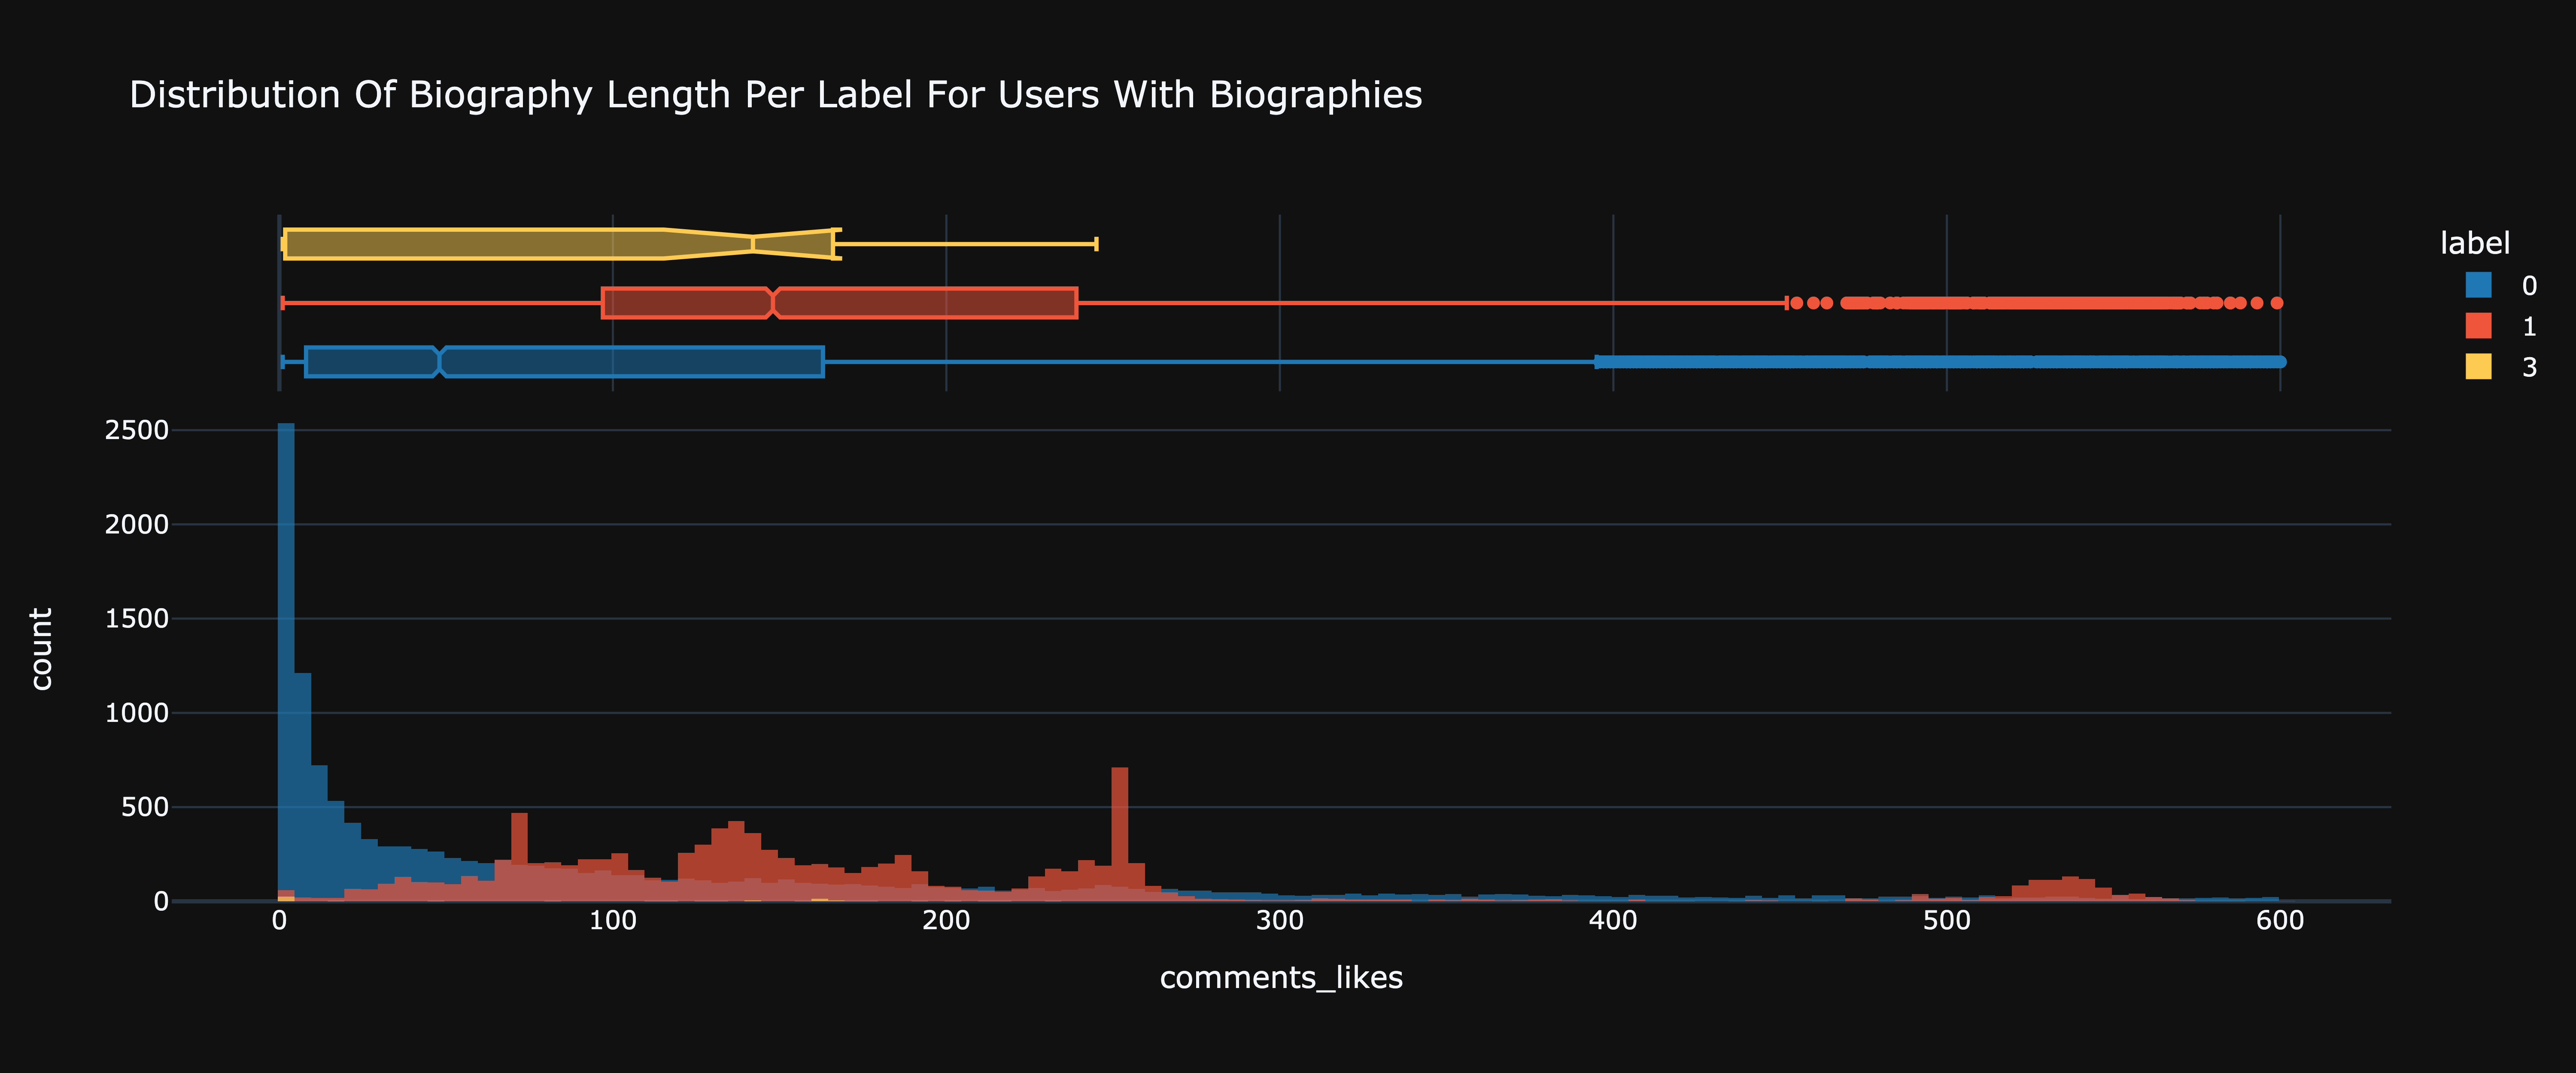

In [20]:
# Biography length distribution
fig = px.histogram(
    df_main.query('outlier == ""'),
    x='comments_likes', 
    nbins=200,
    color="label",
    opacity=.7,
    marginal="box", # or violin, rug)
    title=f'Distribution of Biography Length per Label for users with biographies',
    **plotly_kwargs
    )

fig = fig.update_layout(barmode='overlay')

# sv.save_plotly_fig(fig)
sv.save_plotly_fig(fig)

In [21]:
(df_main.query('label == 3')['comments_likes'] > 0).value_counts(normalize=True).multiply(100).round(1)

False   90.1
True     9.9
Name: comments_likes, dtype: float64

There's a very clear distinction between the distribution of the likes on the comments. 
* Other bots have almost no likes on their comments. Their Q3 is at 0 and avg at 11 with only 10% of them having at least a like.
* The bots definitely have a weird distribution. It's kinda like waves and they don't have anything between 300 and 500 but then have a bump, this is sus.
* Legit users have what seems to be a very skewed but guessable distribution. The more the likes, the less the people have them.

It'll be interesting to see how that that correlates with time difference

#### 1.2.1 Comment Time Difference

In [22]:
df_main.describe_column_by_colcat('comment_time_difference')[0]

all      0      1      3
count  30498  18628  10927    943
mean    1429   2251     93    651
std     7439   9335   1331   3674
min        4      4      4      6
25%       26     56     18     39
50%       64    144     25     97
75%      232    399     40    300
max    85224  85224  70111  67532

In [23]:
# Calculating outliers and flagging them
lower, upper = df_main.outliers_bound('comment_time_difference')
df_main['outlier'] = df_main['comment_time_difference'].apply(lambda x: '' if lower < x < upper else 'comment_time_difference')
lower, upper

(4, 541.0)

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_comment_time_difference_per_label.html


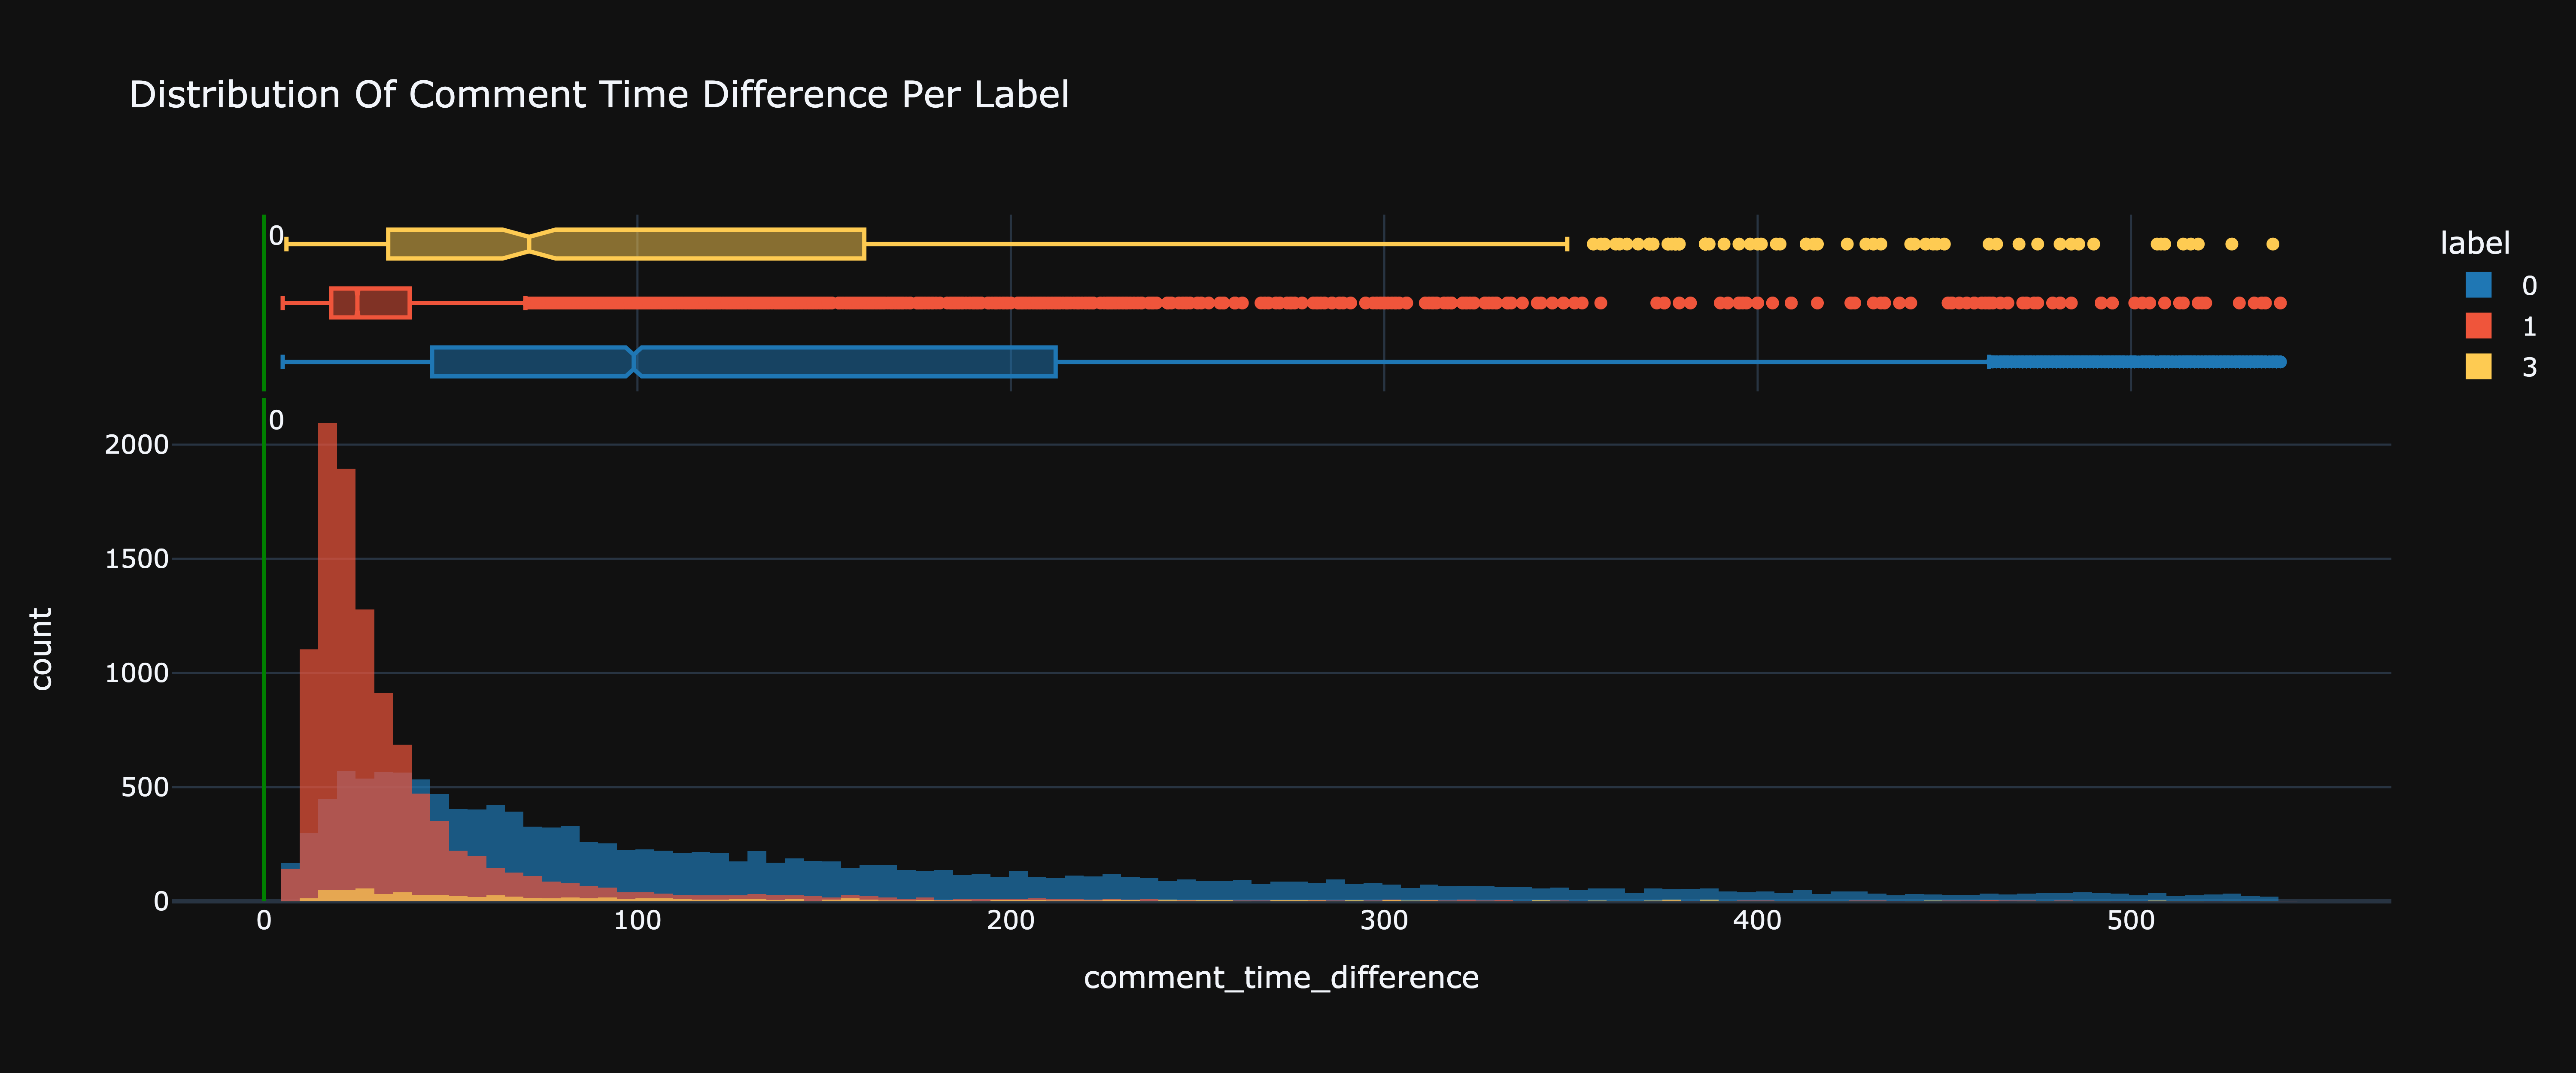

In [24]:
# Biography length distribution
fig = px.histogram(
    df_main.query('outlier == ""'),
    x='comment_time_difference', 
    nbins=200,
    color="label",
    opacity=.7,
    marginal="box", # or violin, rug
    title=f'Distribution of Comment Time Difference per Label<br><sub>Comment time difference is the time difference between the comment and the post in seconds',
    **plotly_kwargs
    )

fig = fig.update_layout(barmode='overlay')
fig  = fig.add_vline(x=0, line_color="green", line_width=2, annotation_text="0")

# sv.save_plotly_fig(fig)
sv.save_plotly_fig(fig)

In [25]:
(df_main.query('label == 3')['comments_likes'] > 0).value_counts(normalize=True).multiply(100).round(1)

False   90.1
True     9.9
Name: comments_likes, dtype: float64

Same as before, there is a clear distinction between the three distribution: 
* Bots are way more skewed towards 0 with most commenting under 70seconds
* legit users 

In [26]:
df_main[[col for col in df_main if 'com' in col and 'post' not in col]].isna().sum()

comments_likes                  0
comment_emoji_count             0
comment_emoji_count_distinct    0
comment_time_difference         0
comment_grams_count             0
comment_length                  0
comment_word_count              0
dtype: int64

### 1.3 Biography - 90% done


In [27]:
print(f'Nulls: {df_main.biography.isna().sum()}')

Nulls: 0


In [28]:
df_main.biography.describe(include='all')

count     30498
unique    11361
top            
freq       6416
Name: biography, dtype: object

#### 1.3.1 biography wordcloud

In [29]:
# # Plot wordcloud
# for label in (0, 1, 3):
#     print(f'Label: {label}')
#     wordcloud = WordCloud(width=1800, 
#                           height=1200, 
#                           min_font_size=1, 
#                           max_words=500, 
#                           colormap='tab10')
                          
#     word_list = ' '.join([word for list in df_main.query(f'label == {label}')['biography_wo_emoji'].str.split(' ') for word in list])
#     wordcloud.generate(word_list)

#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.savefig(f'{viz_dir}/wordcloud_biography_{label}.png', dpi=300, pad_inches=0.0, bbox_inches='tight')
#     plt.show()

#### 1.3.2 Calculating bi/tri/quad grams

In [30]:
sub_df = df_main.loc[:, ['biography_wo_emoji', 'label']].drop_duplicates()
df_bio_grams = calculate_grams(sub_df, 'biography_wo_emoji', 20)
df_bio_grams = keep_top_n_grams(df_bio_grams, 30)
plot_grams(df_bio_grams)

#### 1.3.3 Feature engineering
For each biography, count how many of the top30 grams to they have

In [31]:
# Adding tri/quad grams count to main df
bots_triquadgrams = df_bio_grams.query('label > 0 and gram_degree > 2').gram.unique().tolist()

def count_grams(text, grams):
    count = 0
    for gram in grams:
        gram = gram.split(',')
        if all(word in text for word in gram):
            count += 1
    return count


df_main['biography_grams_count'] = df_main.biography_wo_emoji.apply(lambda x: count_grams(x, bots_triquadgrams))

print('% of each label having at least one tri/quad gram')
for label in (0, 1, 3): 
    current_df = df_main.query(f'label == {label}')['biography_grams_count'] > 0
    current_df = current_df.value_counts(normalize=True)
    display(current_df.to_frame(name=f'Label: {label}').round(3))

% of each label having at least one tri/quad gram


Label: 0
False     0.997
True      0.003

Label: 1
False     0.843
True      0.157

Label: 3
True      0.511
False     0.489

In [32]:
# Adding comment length and word count
df_main['biography_length'] = df_main['biography'].str.len()
df_main['biography_word_count'] = df_main['biography'].str.count(' ') + 1
df_main['biography_linebreak_count'] = df_main['biography'].str.count('\n')

# Dropping columns
df_main = df_main.drop(columns=['biography', 'biography_wo_emoji', 'biography_emoji'])
df_main.head(1)

username  biography_emoji_count  \
0  adorable-jade-beluga                    6.0   

   biography_emoji_count_distinct  follow_count  follower_count pronouns  \
0                             6.0       3,164.0         4,676.0     None   

            domain  comments_likes  comment_emoji_count  \
0  mintyswraps.com             967                    2   

   comment_emoji_count_distinct  comment_time_difference  post_count  \
0                             2                       95        76.0   

   video_count  highlight_reel_count  hide_like_and_view_counts  has_guides  \
0          6.0                   8.0                        0.0         0.0   

   has_clips  is_private  is_embeds_disabled  is_joined_recently  \
0        1.0         0.0                 0.0                 0.0   

   is_professional_account  is_business_account business_contact_method  \
0                      0.0                  0.0                 UNKNOWN   

  business_category_name category_name category_enum  should_show_category  \
0                   None          None          None                   0.0   

   should_show_public_contacts   posts_days_diff   posts_hours_diff  \
0                          0.0 848.5854861107655 20,366.05166665837   

   is_verified  label labelling_technique  binary_label outlier  \
0          0.0      0      label_tbl_fake             0           

   comment_grams_count  comment_length  comment_word_count  \
0                    0              29                   7   

   biography_grams_count  biography_length  biography_word_count  \
0                      0                73                    13   

   biography_linebreak_count  
0                          3

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_biography_length_per_label_for_users_with_biographies.html


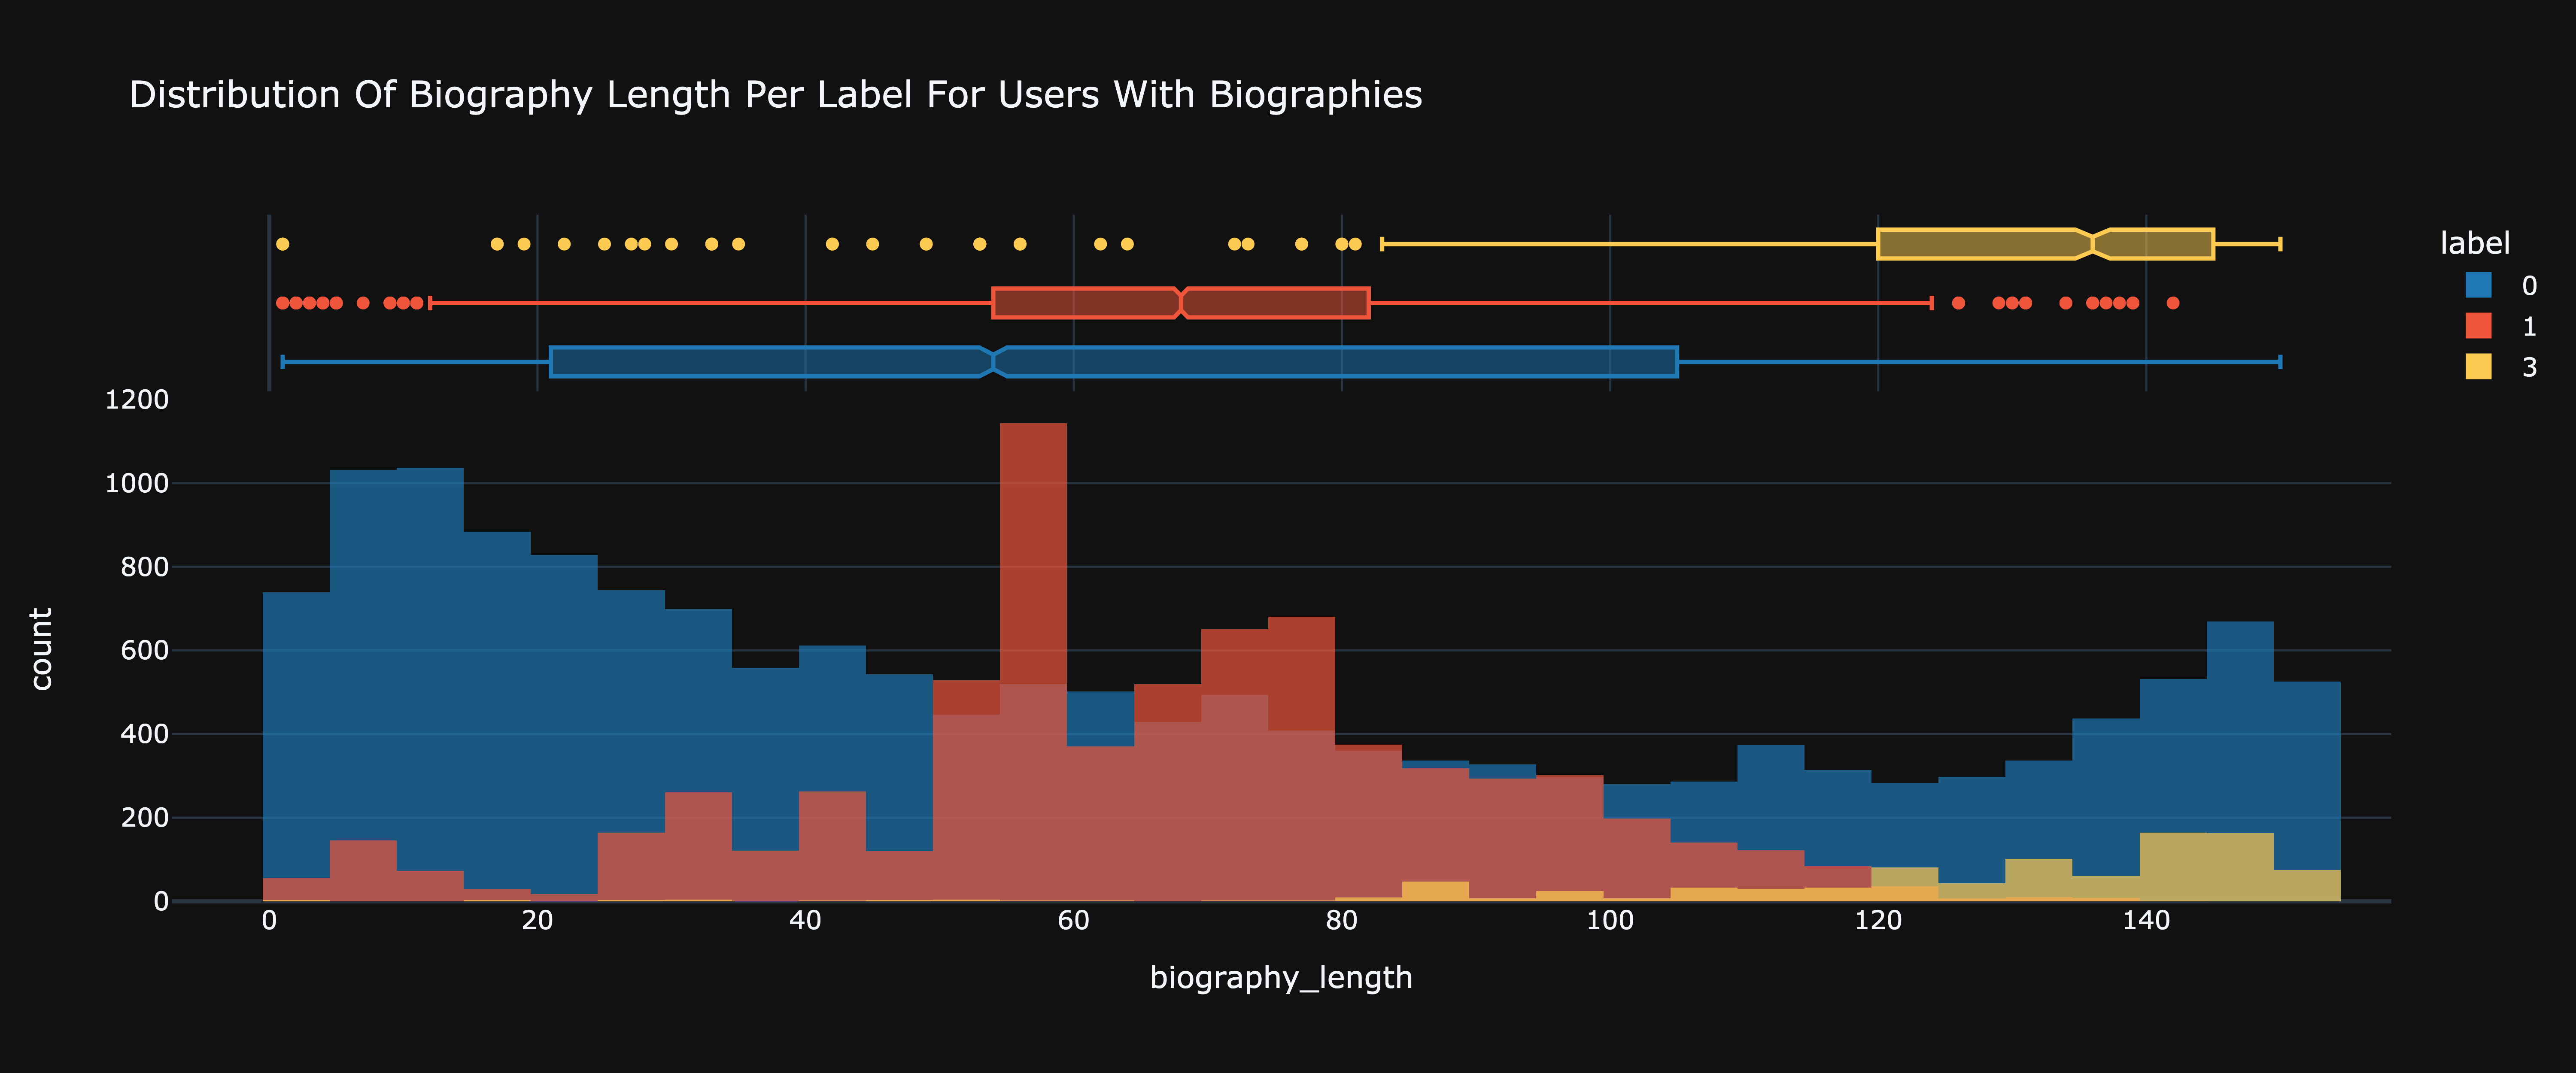

In [33]:
# Biography length distribution
sub_df = df_main.query('biography_length > 0')
fig = px.histogram(
    sub_df,
    x='biography_length', 
    nbins=50,
    color="label",
    opacity=.7,
    marginal="box", # or violin, rug)
    title=f'Distribution of Biography Length per Label for users with biographies',
    **plotly_kwargs
    )

fig = fig.update_layout(barmode='overlay')

# sv.save_plotly_fig(fig)
sv.save_plotly_fig(fig)

For the users having a biography:
* Legit users tend to have a shorter biography with 50% less than 48 characters. Their IQR is 77 and they occupy all bounds of the distribution. 
* Bots have half of their bio between 55 nd 81 characters (IQR) and generally dont use less than 20 characters or more than 120 
* The other type of bot, also has its own distribution with 75% of their bio having more than 120 characters. 

### 1.4 Follow & Follower Count - Missing insights (markdown)

The columns follow and follower count are the number of people following and being followed by the user.

In [34]:
current_columns = ['follow_count', 'follower_count']
for col in current_columns: 
    print(f'Missing values {col}: {df_main[col].isna().sum()}')

Missing values follow_count: 0
Missing values follower_count: 0


#### 1.4.1 Follow Count

In [35]:
df_describe, fig = df_main.describe_column_by_colcat('follow_count')

display(df_describe)
fig.update_layout(yaxis_range=[0, 2300])

all      0      1     3
count  30498  18628  10927   943
mean     726    922    300  1804
std     1183   1229    932  1138
min        0      0      0     4
25%       54    231      6  1170
50%      321    532     33  1636
75%      851   1023    228  2207
max     7508   7508   7350  7501

In [36]:
df_main = print_outliers(df_main, 'follow_count')

Lower bound: 0.0 - Upper bound: 2048.375

2545 outliers found

Label: 0


Condition  Count  Percentage
0       True  16691        89.6
1      False   1937        10.4

Label: 1


Condition  Count  Percentage
0       True  10617        97.2
1      False    310         2.8

Label: 3


Condition  Count  Percentage
0       True    645        68.4
1      False    298        31.6

In [37]:
fig = px.histogram(df_main,#.query('outlier.str.contains("follow_count") == False'),
                   x="follow_count", 
                   nbins=500,
                   color="label",
                   opacity=.7,
                   marginal="box", # or violin, rug)
                   title='Distribution of the follow count per label',
                   **plotly_kwargs
                   )


fig = fig.update_layout(barmode='overlay')

# sv.save_plotly_fig(fig)
sv.save_plotly_fig(fig, 'fig')

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_the_follow_count_per_label.html


The distribution of the follow count is very interesting. All labels' interquartile range (between Q1 and Q3) occupy the 0-2.5k follow count range. the main category of bots (sex bots, main obj of the project) tend to follow between 0 and 243 accounts. from 240 to 1,030 there are the legit users and from 1100 to 2.2k, the other type of bot. 


The bots (1) tend to be more about mass commenting, that's how they scam people
The legit user have a larger distribution and are more diverse
The other type of bot have a higher distribution.

#### 1.4.2 Follower count

In [38]:
# Describing column for each label
sub_df, fig = df_main.describe_column_by_colcat('follower_count')

print('Follower count: ')
display(sub_df.style.format('{:,}'))
# sv.save_plotly_fig(fig)

Follower count: 


In [39]:
# Outliers
df_main = print_outliers(df_main, 'follower_count')

Lower bound: 0.0 - Upper bound: 3152.0

4464 outliers found

Label: 0


Condition  Count  Percentage
0       True  14388        77.2
1      False   4240        22.8

Label: 1


Condition  Count  Percentage
0       True  10902        99.8
1      False     25         0.2

Label: 3


Condition  Count  Percentage
0       True    744        78.9
1      False    199        21.1

Seeing the bots at 6k max follower and other bots at 14k, I can assume that none, even if not labelled yet, can have more than 30k followers to be large.

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_the_follower_count_per_label.html


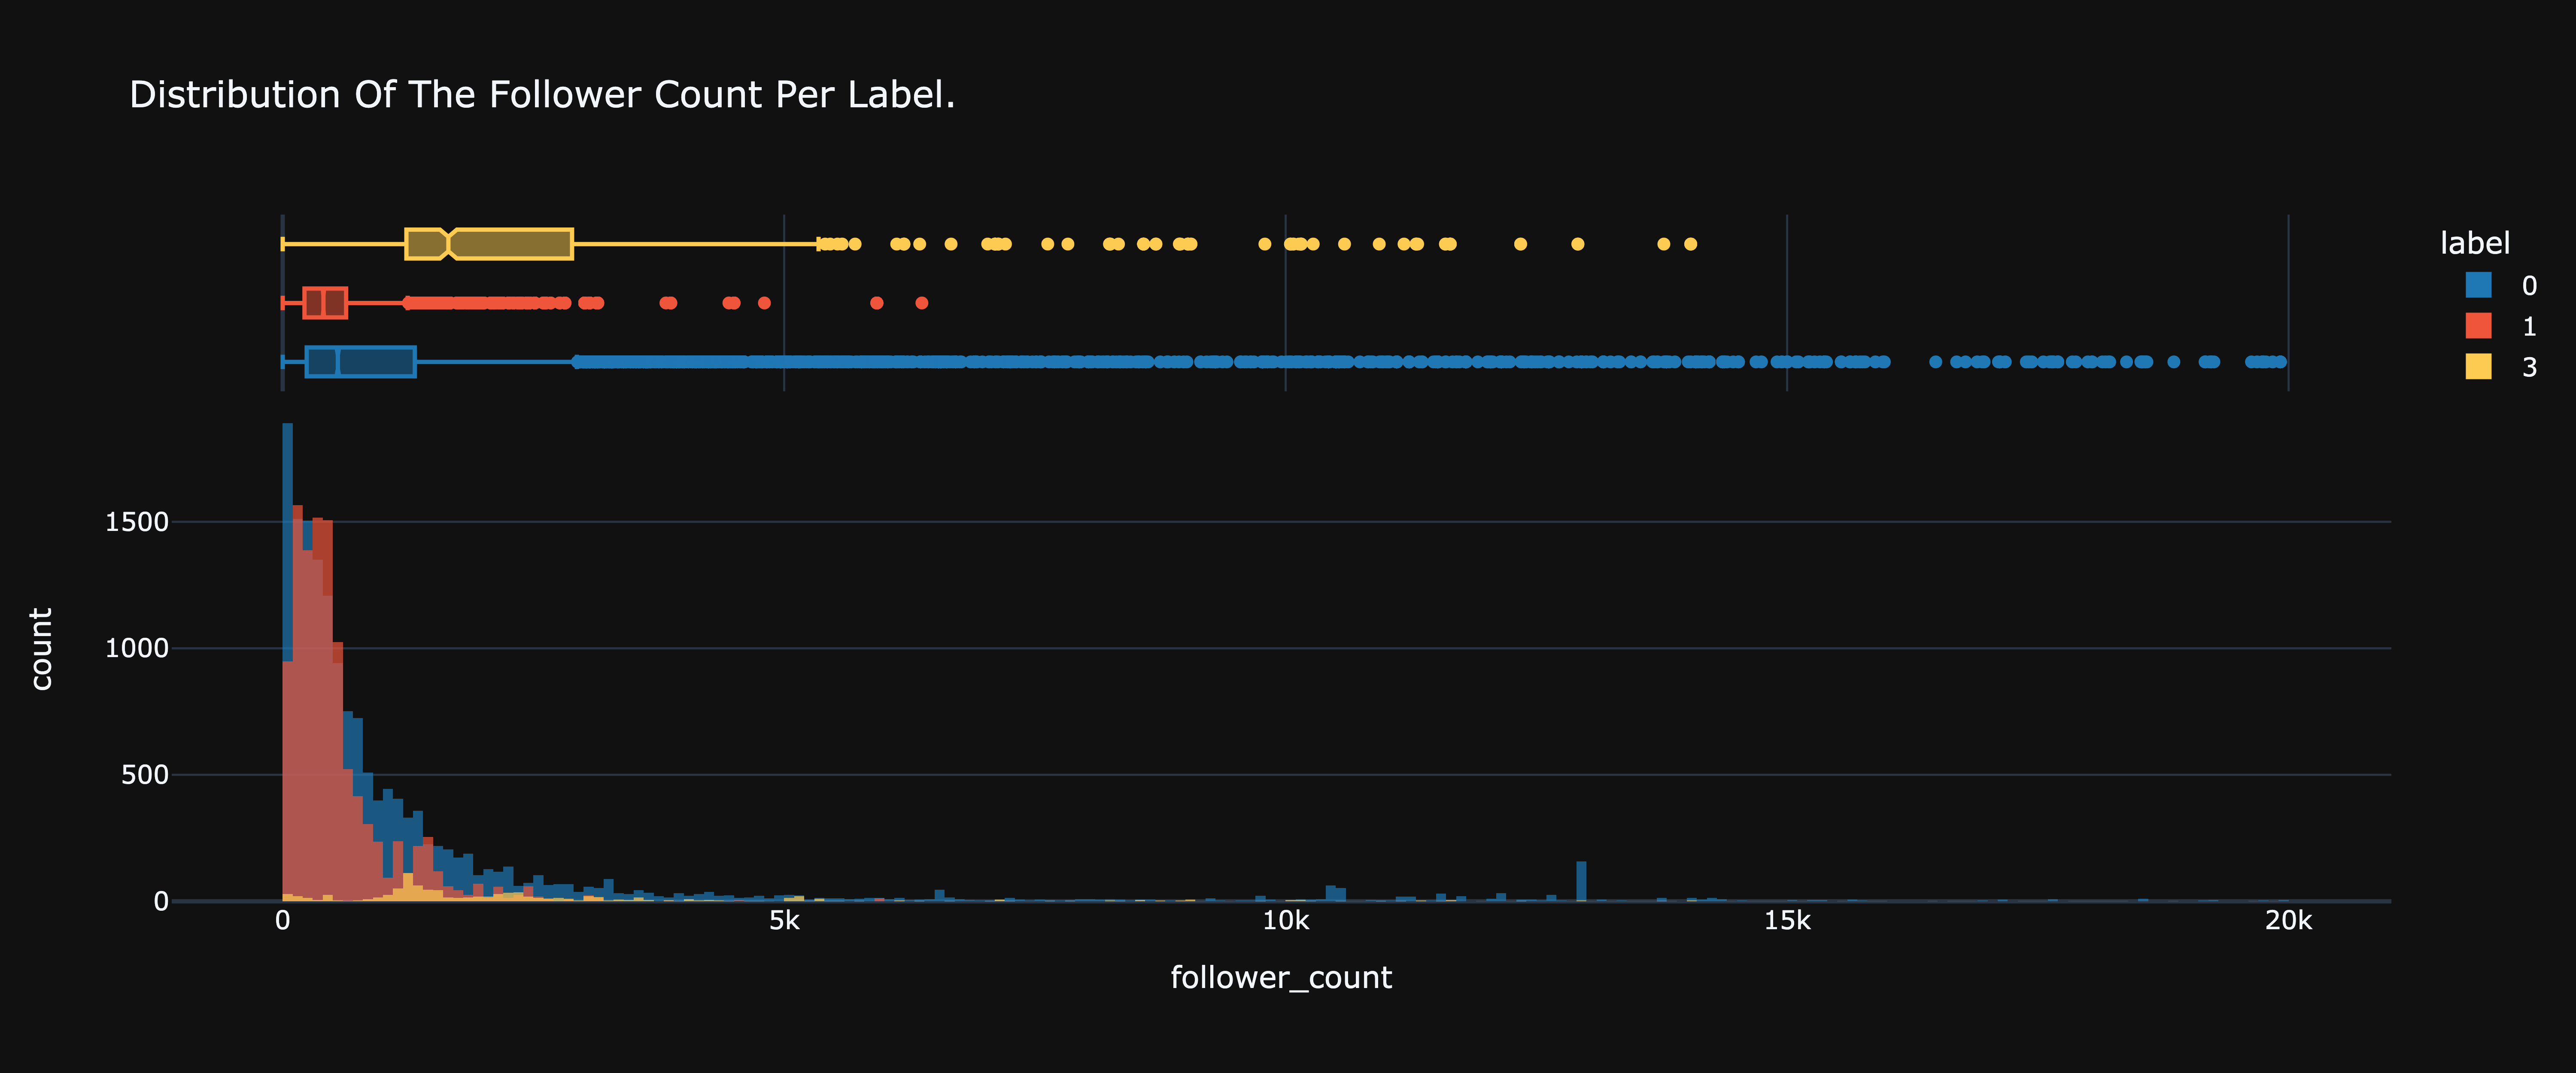

In [40]:
# Plotting follower count distribution
fig = px.histogram(df_main.query('follower_count < 20000'), 
                   x="follower_count", 
                   nbins=200,
                   color="label",
                   opacity=.7,
                   marginal="box", # or violin, rug
                   title='Distribution of the follower count per label.<br><sub>Numbers next to lines are the quantiles.',
                   **plotly_kwargs
                   )

# max_follower_bot = df_main.query('label > 0')['follower_count'].max() * 2

fig = fig.update_layout(barmode='overlay')

sv.save_plotly_fig(fig)

#### 1.3.3 Feature engineering?

### 1.5 Posts, videos and highlight count - Mostly done, missing insights

Those three columns are about the content of the users, counting the posts (photos and videos), videos and highlight reel (old stories showing on profile).

In [41]:
current_columns = ['post_count', 'video_count', 'highlight_reel_count']
for col in current_columns: 
    print(f'Missing values {col}: {df_main[col].isna().sum()}')

Missing values post_count: 0
Missing values video_count: 0
Missing values highlight_reel_count: 0


#### 1.5.1 Post count

In [42]:
# Describing column for each label
sub_df, fig = df_main.describe_column_by_colcat('post_count')

print('Post count described by label: ')
display(sub_df.style.format('{:,}'))
# sv.save_plotly_fig(fig, 'fig')

Post count described by label: 


In [43]:
df_main = print_outliers(df_main, 'post_count')

Lower bound: 0.0 - Upper bound: 78.5

5952 outliers found

Label: 0


Condition  Count  Percentage
0       True  12803        68.7
1      False   5825        31.3

Label: 1


Condition  Count  Percentage
0       True  10806        98.9
1      False    121         1.1

Label: 3


Condition  Count  Percentage
0       True    937        99.4
1      False      6         0.6

Most of the outliers are for the legit users, there's only a small percentage of the bots being outliers compared to the legit users. This is due as the bots need some photos to make people believe they have an account but generally have the same numbers of posts, once they posted their photos they are good. Legit users is the group having the most outliers as people normally have one single acccount where they post photos over the years and more frequently.

In [44]:
# df_main

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_the_post_count_per_label.html


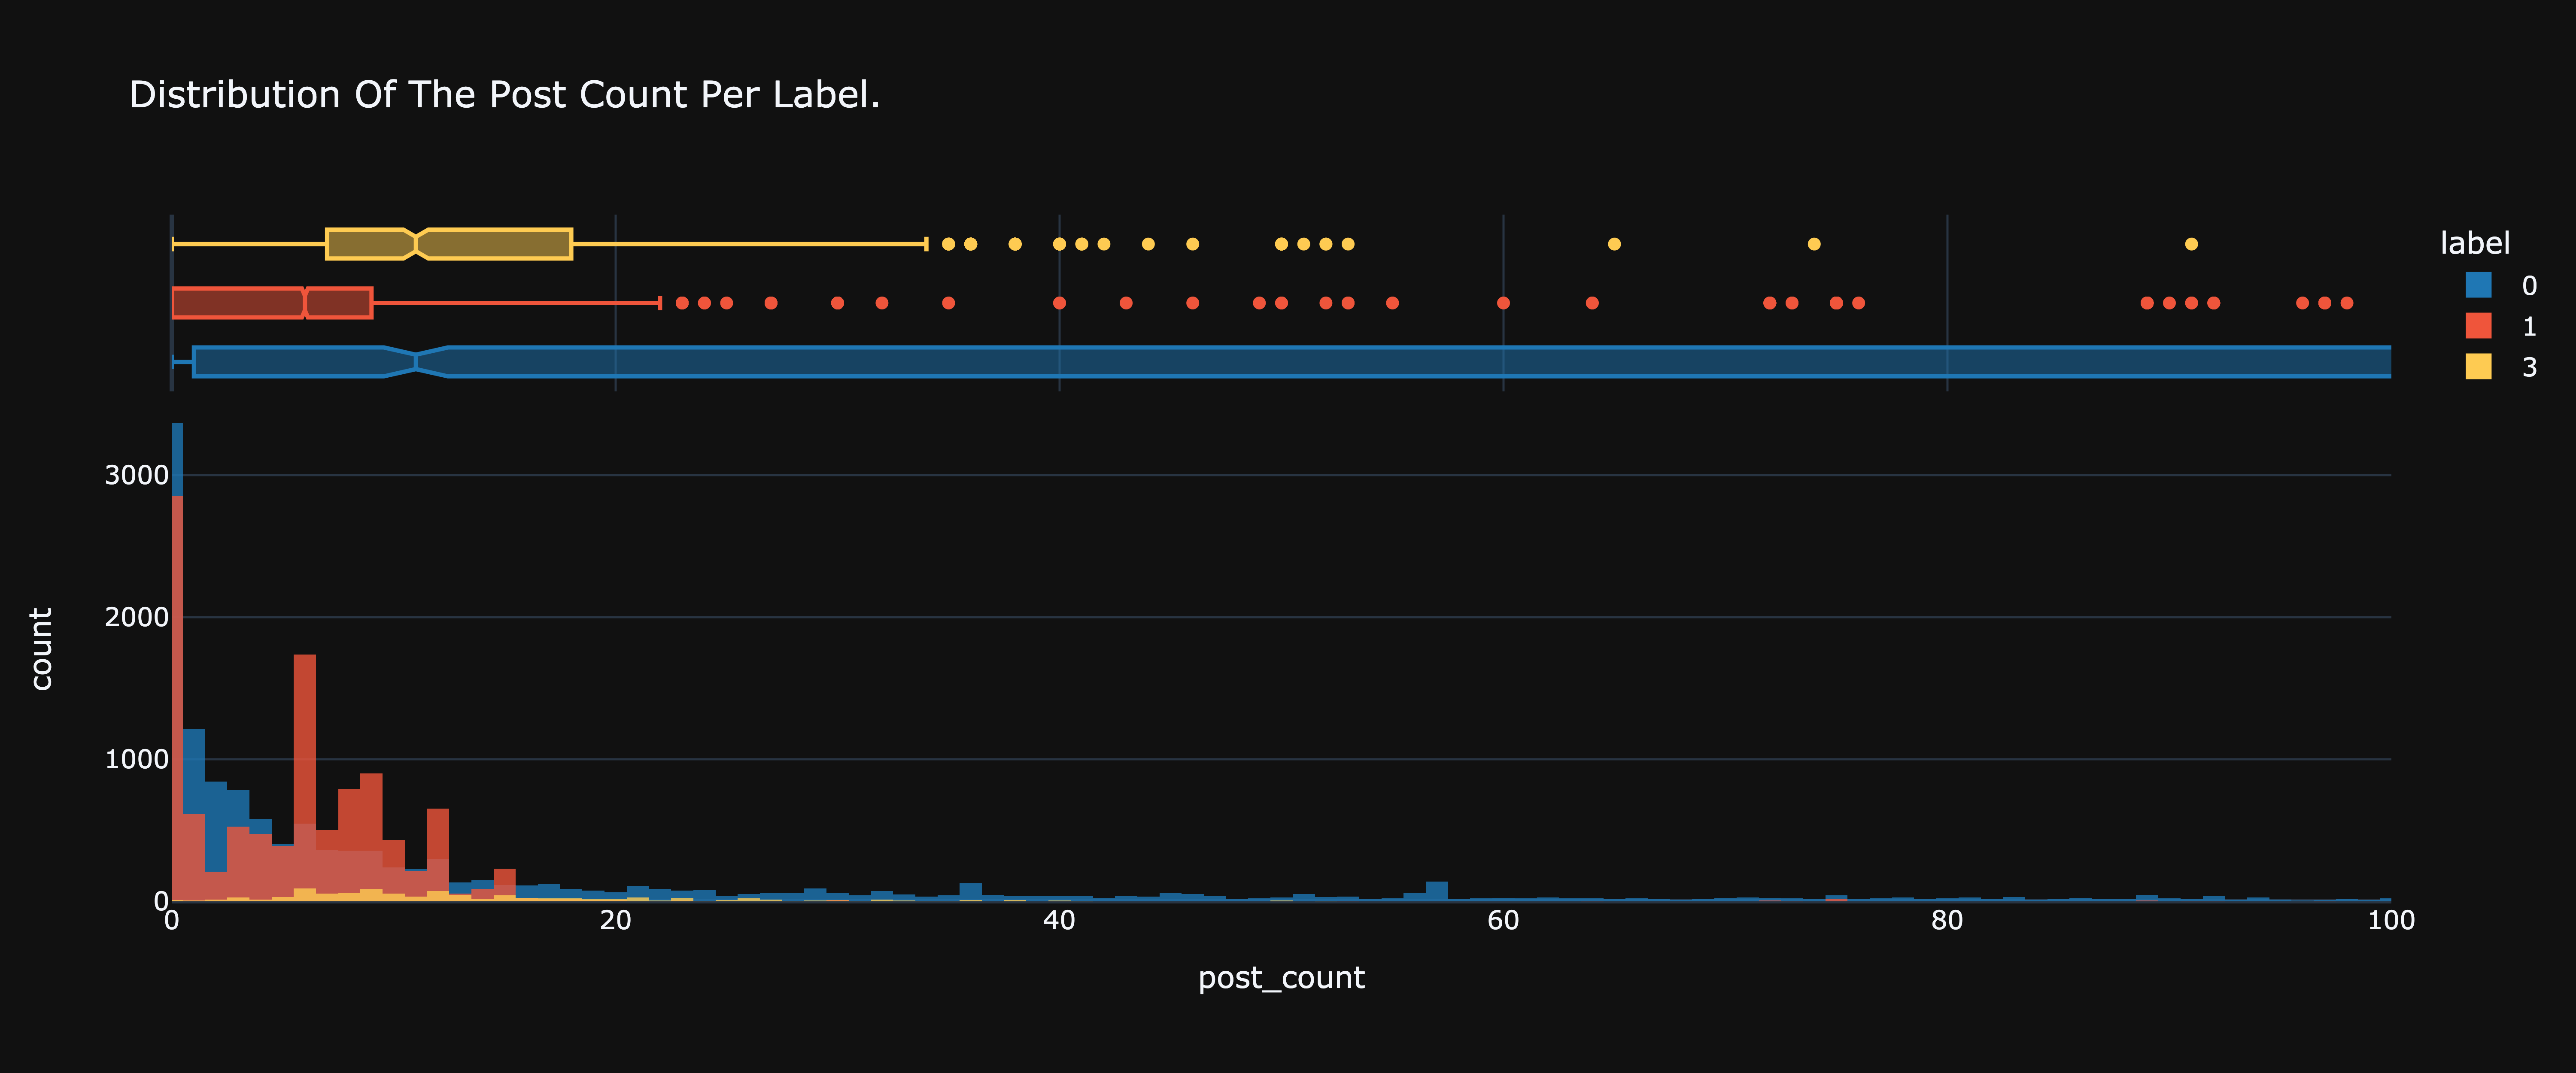

In [45]:

fig = px.histogram(df_main.query('post_count < 5000'), 
                   x="post_count", 
                   nbins=5000,
                   color="label",
                   opacity=.8,
                   marginal="box", # or violin, rug
                   title='Distribution of the post count per label.',
                   **plotly_kwargs
                   )


fig = fig.update_layout(barmode='overlay', xaxis_range=(0, 100)) # Default range is 0, 100 but can be changed to max by double clicking on plolty viz

sv.save_plotly_fig(fig)

#### 1.5.2 Video Count

In [46]:
# Describing column for each label
sub_df, fig = df_main.describe_column_by_colcat('video_count')

print('Post count described by label: ')
display(sub_df.style.format('{:,}'))
# sv.save_plotly_fig(fig, 'fig')

Post count described by label: 


In [47]:
df_main = print_outliers(df_main, 'video_count')

Lower bound: 0.0 - Upper bound: 0.0

30498 outliers found

Label: 0


Condition  Count  Percentage
0       True  12101        65.0
1      False   6527        35.0

Label: 1


Condition  Count  Percentage
0       True  10624        97.2
1      False    303         2.8

Label: 3


Condition  Count  Percentage
0       True    776        82.3
1      False    167        17.7

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_the_video_count_per_label_(max_1000).html


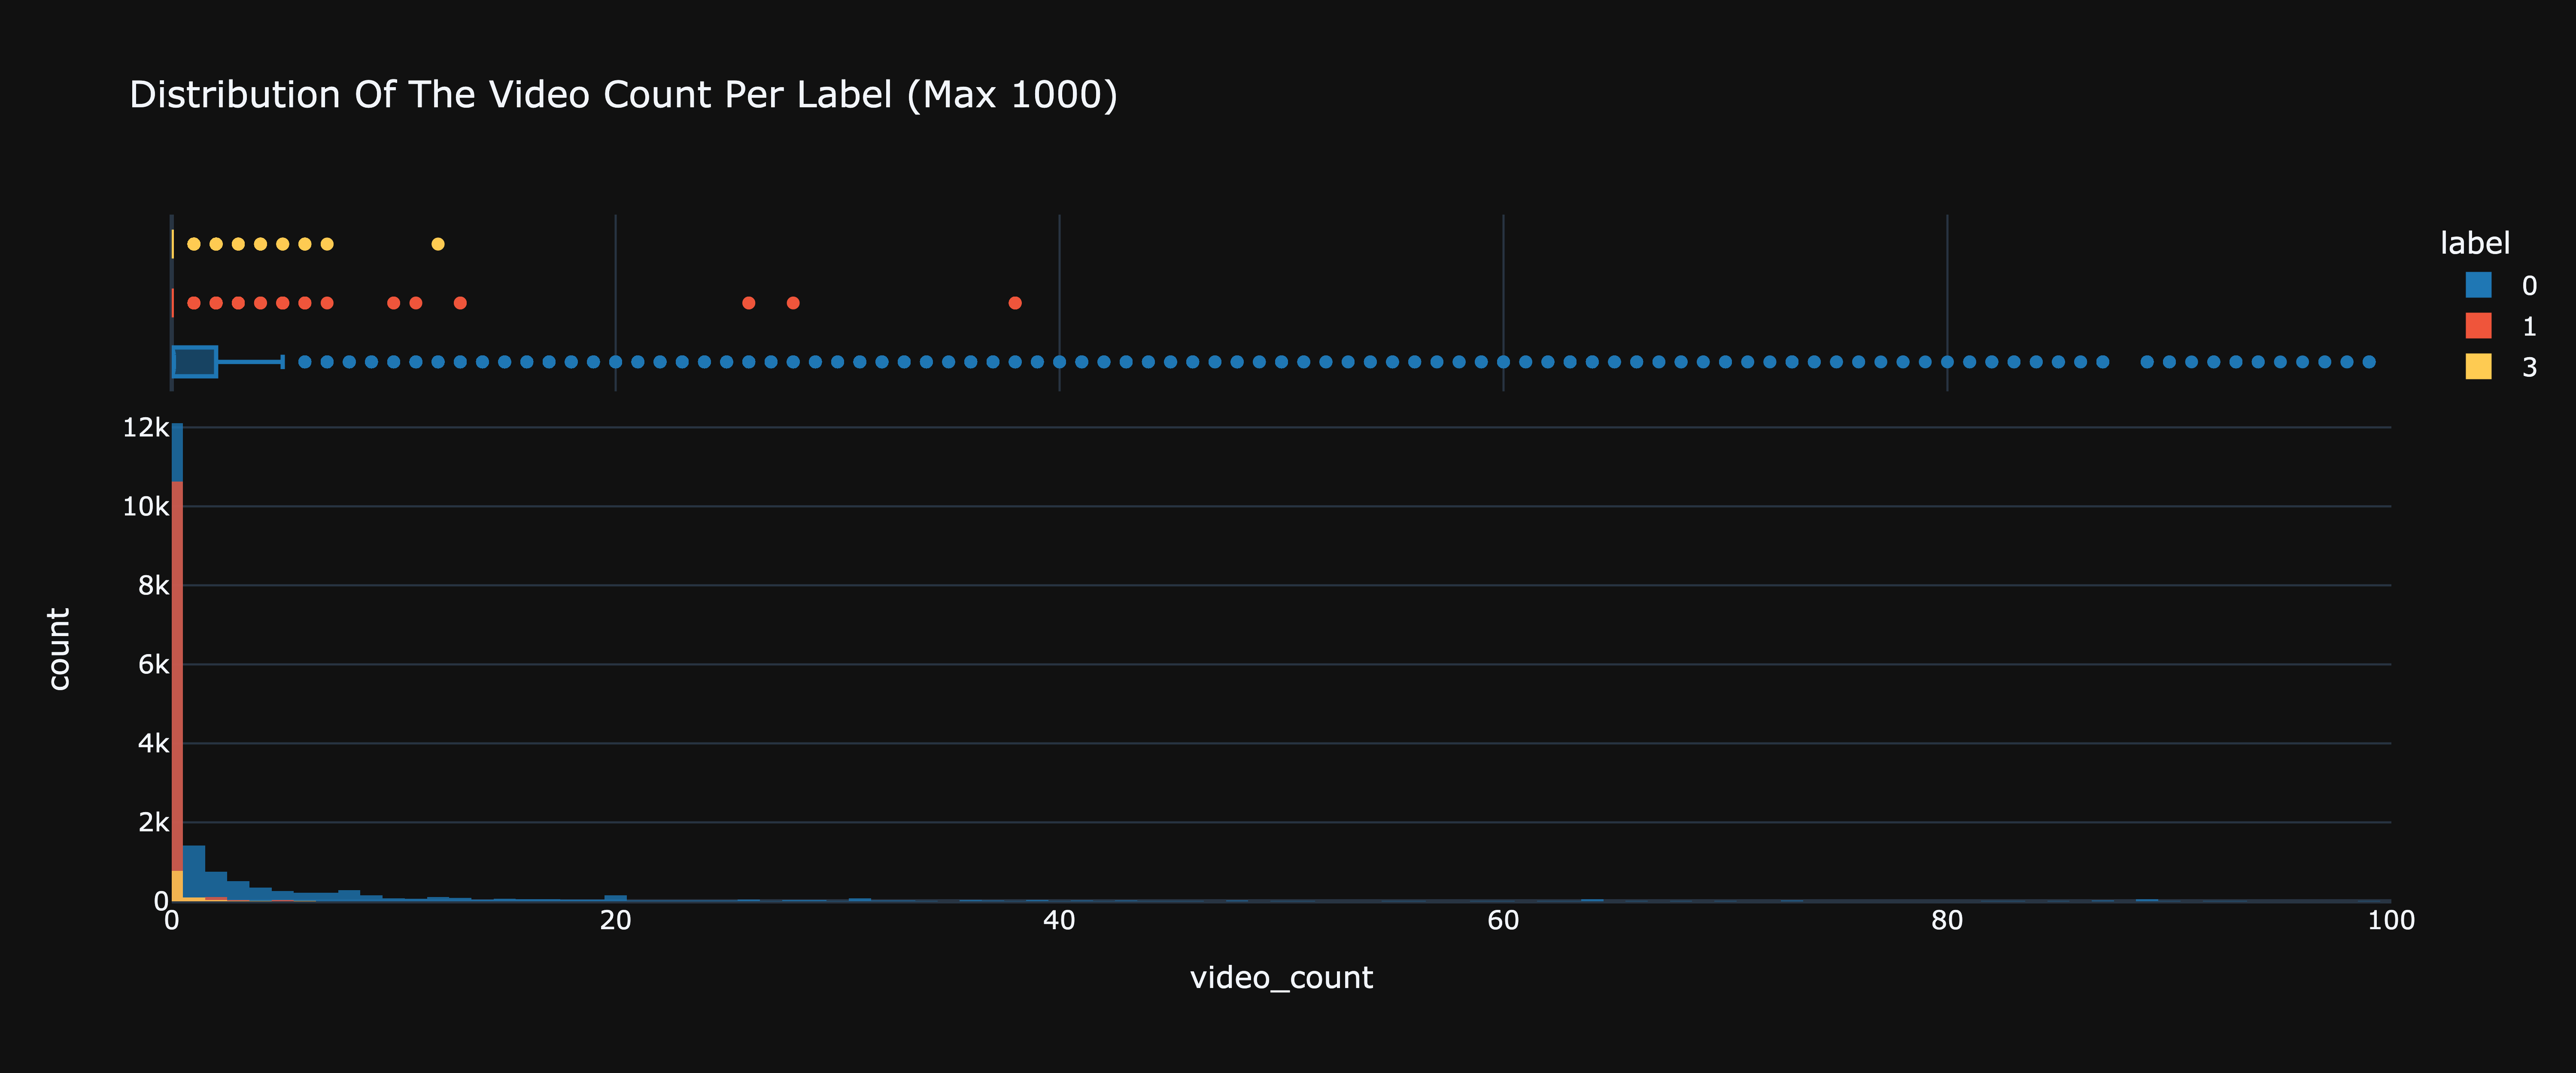

In [48]:
fig = px.histogram(df_main.query('video_count < 1000'), 
                   x="video_count", 
                   nbins=1000,
                   color="label",
                   opacity=.8,
                   marginal="box", # or violin, rug
                   title='Distribution of the video count per label (max 1000)',
                   **plotly_kwargs
                   )


fig = fig.update_layout(barmode='overlay', xaxis_range=(0, 100)) # Default range is 0, 100 but can be changed to max by double clicking on plolty viz

sv.save_plotly_fig(fig)

Unsurprisingly, most of the users have 0 video. The legit users have a very skewed distribution with a lot of outliers. 

#### 1.5.3 Highlight Reel Count

In [49]:
# Describing column for each label
sub_df, fig = df_main.describe_column_by_colcat('highlight_reel_count')

print('Post count described by label: ')
display(sub_df.style.format('{:,}'))
sv.save_plotly_fig(fig, 'fig')

Post count described by label: 


Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/summary_stats_per_label_for_column_highlight_reel_count.html


In [50]:
df_main = print_outliers(df_main, 'highlight_reel_count')

Lower bound: 0.0 - Upper bound: 5.0

4960 outliers found

Label: 0


Condition  Count  Percentage
0       True  15133        81.2
1      False   3495        18.8

Label: 1


Condition  Count  Percentage
0       True  10817        99.0
1      False    110         1.0

Label: 3


Condition  Count  Percentage
0      False    571        60.6
1       True    372        39.4

In [51]:

fig = px.histogram(df_main.query('highlight_reel_count < 1000'), 
                   x="highlight_reel_count", 
                   nbins=1000,
                   color="label",
                   opacity=.8,
                   marginal="box", # or violin, rug
                   title='Distribution of the highlight reel count per label',
                   **plotly_kwargs
                   )


fig = fig.update_layout(barmode='overlay', xaxis_range=(0, 100)) # Default range is 0, 100 but can be changed to max by double clicking on plolty viz

sv.save_plotly_fig(fig, 'fig')

Link for interactability (plotly chart): http://htmlpreview.github.io/?https://github.com/marclelamy/viz/blob/main/instabot/distribution_of_the_highlight_reel_count_per_label.html


In [52]:
for i in range(5): 
    p = df_main.query(f'highlight_reel_count >= {i} and label == 3').shape[0] / df_main.query(f'label == 3').shape[0]
    print(f'{p:.0%} of the bots have {i} or more highlight reels')

100% of the bots have 0 or more highlight reels
80% of the bots have 1 or more highlight reels
77% of the bots have 2 or more highlight reels
75% of the bots have 3 or more highlight reels
72% of the bots have 4 or more highlight reels


Other tye of bot has its distribution quite different from both other groups. 80% of the other bots have highlight reels, quite an important feature for them.

### 1.6 Pronouns - Done ✅

In [53]:
# Checking for missing values
for label in (0, 1, 3): 
    sub_df = df_main.query(f"label == {label}")
    p = sub_df['pronouns'].isna().sum() / sub_df.shape[0] * 100
    print(f'Label: {label} - % of users with pronouns: {p:.2f}%')

Label: 0 - % of users with pronouns: 96.81%
Label: 1 - % of users with pronouns: 99.94%
Label: 3 - % of users with pronouns: 99.68%


Most of the users having a pronoun are legit users and but some bots have it too. There are a ton of missing values (>98%) so I'll just create a flag for originally missing/not missing.

In [54]:
df_main['pronouns_na_flag'] = df_main['pronouns'].isna().astype(int)
df_main = df_main.drop('pronouns', axis=1)
df_main.head(1)

username  biography_emoji_count  \
0  adorable-jade-beluga                    6.0   

   biography_emoji_count_distinct  follow_count  follower_count  \
0                             6.0       3,164.0         4,676.0   

            domain  comments_likes  comment_emoji_count  \
0  mintyswraps.com             967                    2   

   comment_emoji_count_distinct  comment_time_difference  post_count  \
0                             2                       95        76.0   

   video_count  highlight_reel_count  hide_like_and_view_counts  has_guides  \
0          6.0                   8.0                        0.0         0.0   

   has_clips  is_private  is_embeds_disabled  is_joined_recently  \
0        1.0         0.0                 0.0                 0.0   

   is_professional_account  is_business_account business_contact_method  \
0                      0.0                  0.0                 UNKNOWN   

  business_category_name category_name category_enum  should_show_category  \
0                   None          None          None                   0.0   

   should_show_public_contacts   posts_days_diff   posts_hours_diff  \
0                          0.0 848.5854861107655 20,366.05166665837   

   is_verified  label labelling_technique  binary_label  \
0          0.0      0      label_tbl_fake             0   

                                             outlier  comment_grams_count  \
0  , follow_count, follower_count, video_count, h...                    0   

   comment_length  comment_word_count  biography_grams_count  \
0              29                   7                      0   

   biography_length  biography_word_count  biography_linebreak_count  \
0                73                    13                          3   

   pronouns_na_flag  
0                 1

### 1.7 Domain - 50% done

The domain column is the domain url that the users had in their bio bu

In [55]:
na_count = df_main['domain'].isna().sum()
print(f"The domain column has {na_count:,} ({na_count / df_main.shape[0]:.1%}) missing values (no link in bio).")

The domain column has 12,447 (40.8%) missing values (no link in bio).


In [56]:
sub_df = df_main.copy(deep=True)
sub_df['domain'] = sub_df['domain'].fillna('None')


df_domain_label_count = sub_df.groupby(['domain', 'label'], as_index=False).agg({'username': 'count'}).rename({'username': 'count'}, axis=1).sort_values('count', ascending=False)
df_domain_count = sub_df.groupby('domain', as_index=False).agg({'username': 'count'}).rename({'username': 'domain_count'}, axis=1)
sub_df = df_domain_label_count.merge(df_domain_count, on='domain', how='left')

sub_df['count_p'] = sub_df['count'] / sub_df['domain_count']
sub_df = sub_df.sort_values(['domain_count', 'count_p'], ascending=[True, False])

px.bar(sub_df.query('domain_count > 500'), 
    x='count_p', 
    y='domain', 
    barmode='stack', 
    color='label', 
    **plotly_kwargs
    )

In [57]:
sub_df.query('domain_count > 500')

domain  label  count  domain_count               count_p
8    open.spotify.com      0    542           542                   1.0
7           twitch.tv      0    543           543                   1.0
3             cutt.ly      1    989           991    0.9979818365287588
242           cutt.ly      0      2           991 0.0020181634712411706
4           linktr.ee      1    956          1388    0.6887608069164265
12          linktr.ee      0    392          1388    0.2824207492795389
50          linktr.ee      3     40          1388   0.02881844380403458
2              bit.ly      1   1522          1570    0.9694267515923567
42             bit.ly      0     48          1570  0.030573248407643312
1           linkr.bio      1   5069          5096     0.994701726844584
77          linkr.bio      3     23          5096  0.004513343799058085
162         linkr.bio      0      4          5096 0.0007849293563579278
0                None      0  11102         12447    0.8919418333735036
5                None      1    767         12447  0.061621274202619106
6                None      3    578         12447   0.04643689242387724

### 1.7.x adding new columns based on if the website contains words from a list

In [ ]:
scam

### 1.8 Business/Verified - Done ✅

There are multiple columns like: `is_business_account`, `is_professional_account`, `category_enum`, `category_name`, `business_category_name`, `business_contact_method`

In [58]:
business_columns = ['is_business_account', 'is_professional_account', 'category_enum', 'category_name', 'business_category_name', 'business_contact_method']

sub_df = df_main[business_columns + ['label']]

for col in business_columns: 
    col_na = sub_df[col].isna()
    if col_na.sum() != 0:
        sub_df[col] = sub_df[col].isna().astype(int)

sub_df.groupby(business_columns, as_index=False)['label'].count()

/var/folders/52/s1w1p2q558xfjlyyyjlbfphr0000gn/T/ipykernel_11662/1305034588.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



is_business_account  is_professional_account  category_enum  \
0                   0.0                      0.0              1   
1                   0.0                      0.0              1   
2                   0.0                      1.0              1   
3                   0.0                      1.0              1   
4                   0.0                      1.0              1   
5                   1.0                      1.0              0   
6                   1.0                      1.0              0   
7                   1.0                      1.0              0   
8                   1.0                      1.0              0   
9                   1.0                      1.0              0   
10                  1.0                      1.0              0   
11                  1.0                      1.0              1   
12                  1.0                      1.0              1   
13                  1.0                      1.0              1   
14                  1.0                      1.0              1   
15                  1.0                      1.0              1   
16                  1.0                      1.0              1   

    category_name  business_category_name  business_contact_method  label  
0               1                       1                        0   1327  
1               1                       1                        1  20365  
2               0                       1                        0    782  
3               0                       1                        1   5067  
4               1                       1                        1      3  
5               0                       0                        0    719  
6               0                       0                        1   1544  
7               0                       1                        0      6  
8               0                       1                        1      5  
9               1                       0                        0     35  
10              1                       0                        1     49  
11              0                       0                        0     80  
12              0                       0                        1    462  
13              1                       0                        0      7  
14              1                       0                        1     38  
15              1                       1                        0      8  
16              1                       1                        1      1

In [59]:
df_business_groupby = df_main.groupby(['is_professional_account', 'is_business_account', 'label'], as_index=False)['username'].count()
df_business_groupby['count_%'] = df_business_groupby['username'] / df_business_groupby['username'].sum()

df_business_groupby.style.background_gradient()

Many bots are creating professional or business accounts. Seems like if you're a business, you're a professional but if you're pro, you're not necessarily a business. The highest combination is that most legit users and bots don't have a professional account. It's good to note that for the otherbots, there are as more accounts as professionals/business than normal accounts.

In [60]:
px.sunburst(df_main.dropna(subset='category_enum').fillna('na'),
            path=['category_enum', 'category_name'],
            color='label',
            ).update_layout(uniformtext=dict(minsize=10, mode='hide'))

In [61]:
# asdf

In [62]:
fig = px.histogram(df_main, 
                    x='category_name', 
                    color='label',
                    title=f'Distribution of labels for each category of category_name for bots and legit users')

fig = fig.update_xaxes(tickangle=-90, categoryorder='total descending') 
fig

In [63]:
fig = px.histogram(df_main.query('label > 0'), 
                    x='category_name', 
                    color='label',
                    title=f'Distribution of labels for each category of category_name for bots only')

fig = fig.update_xaxes(tickangle=-90, categoryorder='total descending') 
fig

In [64]:
fig = px.histogram(df_main.query('label > 0'), 
                    x='business_category_name', 
                    color='label',
                    title=f'Distribution of labels for each category of business_category_name for bots and legit users')

fig = fig.update_xaxes(tickangle=-90, categoryorder='total descending') 
fig

It's interesting to see the difference between the bots and the sex bots. Even though many have been miss labelled (they'll both be marked at 1 when developping the model) bet ween bot or otherbot, there is a significative distinction between how they identify themselves.

Other bots seems to be more entreupreuners, financial service or investment firm where bots are more video creator (you bet), personnal blog or gamer.

In [65]:
df_main.query('label > 0')['category_name'].value_counts().sort_values(ascending=True)[df_main.query('label > 0')['category_name'].value_counts().sort_values(ascending=True).lt(12)].index

Index(['Community', 'Real Estate', 'Coach', 'Video Game Store',
       'Computer Training School', 'Cars', 'Drive In Restaurant',
       'Trade School', 'Music Production Studio', 'Legal', 'Franchise Broker',
       'Beauty, cosmetic & personal care', 'Entertainment website', 'Athlete',
       'Education', 'Dancer', 'Marketing Agency', 'Just for fun',
       'Health/beauty', 'Author', 'Writer', 'Scientist', 'Preschool',
       'Dessert Shop', 'Insurance Broker', 'Financial Consultant',
       'Music video', 'Drug Addiction Treatment Center', 'Musician',
       'Photographer', 'Shopping & retail', 'Local business',
       'Clothing (Brand)', 'Digital creator', 'Public figure', 'Art',
       'Musician/band', 'Blogger'],
      dtype='object')

In [66]:
# Keeping only binary columns
df_main = df_main.drop(['category_name', 'business_category_name', 'business_contact_method', 'category_enum', 'should_show_category'], axis=1)

In [67]:
df_main

username  biography_emoji_count  \
0                adorable-jade-beluga                    6.0   
1           hysterical-glistening-bee                    2.0   
2                  little-crafty-mink                    0.0   
3                 gentle-crimson-wolf                    1.0   
4                festive-uppish-leech                    0.0   
...                               ...                    ...   
30493      attentive-mongoose-of-hail                    1.0   
30494    resourceful-thistle-toucanet                    3.0   
30495           glorious-zippy-agouti                    9.0   
30496  hopping-stallion-of-conversion                    3.0   
30497            loud-nondescript-elk                    2.0   

       biography_emoji_count_distinct  follow_count  follower_count  \
0                                 6.0       3,164.0         4,676.0   
1                                 2.0         114.0            52.0   
2                                 0.0         204.0           422.0   
3                                 1.0         211.0           586.0   
4                                 0.0           0.0             0.0   
...                               ...           ...             ...   
30493                             1.0         278.0           330.0   
30494                             3.0       1,251.0           373.0   
30495                             8.0           0.0           253.0   
30496                             2.0           7.0           918.0   
30497                             1.0       2,733.0        15,392.0   

                domain  comments_likes  comment_emoji_count  \
0      mintyswraps.com             967                    2   
1          youtube.com            1024                    3   
2                 None             711                    1   
3                 None             161                    1   
4                 None             166                    2   
...                ...             ...                  ...   
30493     fanofno1.com             165                    0   
30494             None               4                    1   
30495        linkr.bio             134                    1   
30496        linkr.bio              70                    1   
30497          solo.to             714                    0   

       comment_emoji_count_distinct  comment_time_difference  post_count  \
0                                 2                       95        76.0   
1                                 2                      250         0.0   
2                                 1                      310         0.0   
3                                 1                      180         6.0   
4                                 1                      245         0.0   
...                             ...                      ...         ...   
30493                             0                      211         2.0   
30494                             1                       30        22.0   
30495                             1                       12         9.0   
30496                             1                       62         6.0   
30497                             0                      428     2,594.0   

       video_count  highlight_reel_count  hide_like_and_view_counts  \
0              6.0                   8.0                        0.0   
1              2.0                   0.0                        0.0   
2              0.0                   0.0                        1.0   
3              0.0                   0.0                        0.0   
4              0.0                   0.0                        0.0   
...            ...                   ...                        ...   
30493          0.0                   0.0                        0.0   
30494          1.0                   0.0                        0.0   
30495          0.0                   0.0                        0.0   
30496          0.0         

---

In [68]:
df_main.head()

username  biography_emoji_count  \
0       adorable-jade-beluga                    6.0   
1  hysterical-glistening-bee                    2.0   
2         little-crafty-mink                    0.0   
3        gentle-crimson-wolf                    1.0   
4       festive-uppish-leech                    0.0   

   biography_emoji_count_distinct  follow_count  follower_count  \
0                             6.0       3,164.0         4,676.0   
1                             2.0         114.0            52.0   
2                             0.0         204.0           422.0   
3                             1.0         211.0           586.0   
4                             0.0           0.0             0.0   

            domain  comments_likes  comment_emoji_count  \
0  mintyswraps.com             967                    2   
1      youtube.com            1024                    3   
2             None             711                    1   
3             None             161                    1   
4             None             166                    2   

   comment_emoji_count_distinct  comment_time_difference  post_count  \
0                             2                       95        76.0   
1                             2                      250         0.0   
2                             1                      310         0.0   
3                             1                      180         6.0   
4                             1                      245         0.0   

   video_count  highlight_reel_count  hide_like_and_view_counts  has_guides  \
0          6.0                   8.0                        0.0         0.0   
1          2.0                   0.0                        0.0         0.0   
2          0.0                   0.0                        1.0         0.0   
3          0.0                   0.0                        0.0         0.0   
4          0.0                   0.0                        0.0         0.0   

   has_clips  is_private  is_embeds_disabled  is_joined_recently  \
0        1.0         0.0                 0.0                 0.0   
1        1.0         0.0                 0.0                 0.0   
2        0.0         1.0                 0.0                 0.0   
3        0.0         0.0                 0.0                 0.0   
4        0.0         1.0                 0.0                 0.0   

   is_professional_account  is_business_account  should_show_public_contacts  \
0                      0.0                  0.0                          0.0   
1                      1.0                  0.0                          1.0   
2                      0.0                  0.0                          0.0   
3                      0.0                  0.0                          0.0   
4                      0.0                  0.0                          0.0   

     posts_days_diff   posts_hours_diff  is_verified  label  \
0  848.5854861107655 20,366.05166665837          0.0      0   
1                NaN                NaN          0.0      0   
2                NaN                NaN          0.0      0   
3 221.88200231501833  5,325.16805556044          0.0      0   
4                NaN                NaN          0.0      0   

                         labelling_technique  binary_label  \
0                             label_tbl_fake             0   
1  old_manual_labelling,old_manual_labelling             0   
2  old_manual_labelling,old_manual_labelling             0   
3  old_manual_labelling,old_manual_labelling             0   
4  old_manual_labelling,old_manual_labelling             0   

                                             outlier  comment_grams_count  \
0  , follow_count, follower_count, video_count, h...                    0   
1    , post_count, video_count, highlight_reel_count                    0   
2    , post_count, video_count, highlight_reel_count                    0   
3                , video_count, highlight_reel_count                    0

### 1.9 Binary columns

Here, I'm gonna treat all the binary columns, the one with True/False. Those columns are: 
* has_guides: 
* has_clips
* is_private: The user has a private account (only followers can see their posts)
* is_embeds_disabled: whether the post or media item can be embedded on another website or platform.
* is_joined_recently: whether the user has joined Instagram recently	
* should_show_public_contacts: 

In [69]:
def split_value_count(df, col, label=None):
    if label != None: 
        df = df.query(f'label == {label}')
    # print(df.shape, label)
    val_count = df[col].value_counts().sort_index()
    yes = val_count[1] if 1 in val_count.index else 0
    no = val_count[0] if 0 in val_count.index else 0
    yes_norm = (yes / (yes + no) * 100).round(2)
    no_norm = (no / (yes + no) * 100).round(2)
    return yes, no, yes_norm, no_norm


def plot_binary_distribution_by_label(df, col):
    labels = df['label'].unique()

    # create a dictionary to map label to subplot index
    label_subplot_dict = {label: i+1 for i, label in enumerate(labels)}

    # create figure with 2 rows and 3 columns (top chart uses 3 columns)
    fig = make_subplots(rows=2, cols=len(labels), 
                    specs=[[None] + [{'rowspan': 1, 'colspan': 1}] + [None],
                        [{'rowspan': 1, 'colspan': 1} for label in labels]],
                        subplot_titles=['All Labels'] + [f'Label {label}' for label in labels],
                    x_title='Your master x-title',
                    y_title='Your master y-title', shared_yaxes=True)


    # Adding all data regardless of label
    yes, no, yes_norm, no_norm = split_value_count(df, col)
    fig.add_trace(go.Bar(name='All Labels', 
                            x=['no', 'yes'], 
                            y=[no_norm, yes_norm], 
                            text=[no_norm, yes_norm]), 
                    row=1, col=2)
    

    subplot_titles=[f'All Labels: n={no:,} / y={yes:,}']
    # label subplots
    for label in df['label'].unique():
        yes, no, yes_norm, no_norm = split_value_count(df, col, label)
        subplot_titles.append(f'Label {label} - n={no:,} / y={yes:,}')

        # Adding trace for label
        fig.add_trace(go.Bar(name=f'Label {label}', 
                            x=['no', 'yes'], 
                            y=[no_norm, yes_norm], 
                            text=[no_norm, yes_norm]), 
                                
                        row=2, col=label_subplot_dict[label])

    fig.update_layout(height=800, 
                      title=f'Distribution of Labels by {col.title()}')
    
    subplot_titles += [''] + [''] # This is for the x and y main axis titles
    fig.update_layout(annotations=[{'text': name} for name in subplot_titles])

    return fig

#### 1.9.1 has_guides

whether an Instagram profile has any Guides associated with it or not. Guides are a feature on Instagram that allow users to create and share curated collections of posts and other content, with the goal of providing a more immersive and informative experience around a particular topic.

In [70]:
plot_binary_distribution_by_label(df_main, 'has_guides')

Almost all of the users don't have any guides. The only legit users have guides but only 1.1% of them which is very low.The column is likely to be very weak predictor, but I'll keep it for now.

#### 1.9.2 has_clips

In [71]:
plot_binary_distribution_by_label(df_main, 'has_clips')

In here, the data is highly skewed, most of the users don't have any clips but then ones who have the most are the legit users where 26% of them have some. Both other bots have a very low percentage of users having clips.

#### 1.9.3 is_private

In [72]:
plot_binary_distribution_by_label(df_main, 'is_private')

Once again, skewed data. Legit users and classic bots have a similar percentage of private accounts, about 25-30% versus a percent for the other bots.

When scraping and looking at the user during the whole project, I found many bots that were private. I wonder what the real reason is 

#### 1.9.4 is_embeds_disabled

In [73]:
plot_binary_distribution_by_label(df_main, 'is_embeds_disabled')

This is the most skewed feature of the binary ones, most of the users have embeds enabled. Only a very few users have it disable for some reason.

#### 1.9.5 is_joined_recently

In [74]:
plot_binary_distribution_by_label(df_main, 'is_joined_recently')

This is the most skewed feature of the binary ones, most of the users have embeds enabled. Only a very few users have it disable for some reason.

#### 1.9.6 should_show_public_contacts

In [75]:
plot_binary_distribution_by_label(df_main, 'should_show_public_contacts')

##### 1.9.7 is_verified

In [76]:
plot_binary_distribution_by_label(df_main, 'is_verified')

In [77]:
# Dropping is_verified as it's a constant value
df_main = df_main.drop('is_verified', axis=1)

### Done but need to add above
--- 

In [78]:
# import matplotlib.cm
# cmap = matplotlib.cm.get_cmap('Reds')
def left_subtract(l1,l2):
    lst = []
    for i in l1:
        if i not in l2:
            lst.append(i)
    return lst
def data_suggestions(data):
    """
    Modified by Ram Seshadri. Original idea for data suggestions module was a Kaggler.
    Many thanks to: https://www.kaggle.com/code/itkin16/catboost-on-gpu-baseline
    """
    maxx = []
    minn = []
    all_cols = list(data)
    cat_cols1 = data.select_dtypes(include='object').columns.tolist()
    cat_cols2 = data.select_dtypes(include='category').columns.tolist()
    cat_cols = list(set(cat_cols1+cat_cols2))
    ### The next line may look odd but due to different versions of pandas which
    ### treat the definition of float differently, I am forced to use this. Don't change it.
    num_cols = data.select_dtypes(include='float16').columns.tolist() + data.select_dtypes(
                    include='float32').columns.tolist() + data.select_dtypes(include='float64').columns.tolist()
    non_num_cols = left_subtract(all_cols, num_cols)
    for i in data.columns:
        if i not in cat_cols:
            ### for float and integer, no need to calculate this ##
            minn.append(0)
        else:
            minn.append(data[i].value_counts().min())
    length = len(data)
    nunik = data.nunique()
    nulls = data.isna().sum()
    df = pd.DataFrame(
        {
         #'column': list(data),
        'Nuniques': nunik,
         'NuniquePercent': (100*(nunik/length)),
         'dtype': data.dtypes,
         'Nulls' : nulls,
         'Nullpercent' : 100*(nulls/length),
         'Value counts Min':minn
        },
        columns = ['Nuniques', 'dtype','Nulls','Nullpercent', 'NuniquePercent',
                       'Value counts Min'])
    newcol = 'Data cleaning improvement suggestions'
    print('%s. Complete them before proceeding to ML modeling.' %newcol)
    mixed_cols = [col for col in data.columns if len(data[col].apply(type).value_counts()) > 1]
    df[newcol] = ''
    df['first_comma'] = ''
    if len(cat_cols) > 0:
        mask0 = df['dtype'] == 'object'
        mask1 = df['Value counts Min']/df['Nuniques'] <= 0.05
        mask4 = df['dtype'] == 'category'
        df.loc[mask0&mask1,newcol] += df.loc[mask0&mask1,'first_comma'] + 'combine rare categories'
        df.loc[mask4&mask1,newcol] += df.loc[mask4&mask1,'first_comma'] + 'combine rare categories'
        df.loc[mask0&mask1,'first_comma'] = ', '
        df.loc[mask4&mask1,'first_comma'] = ', '
    mask2 = df['Nulls'] > 0
    df.loc[mask2,newcol] += df.loc[mask2,'first_comma'] + 'fill missing'
    df.loc[mask2,'first_comma'] = ", "
    mask3 = df['Nuniques'] == 1
    df.loc[mask3,newcol] += df.loc[mask3,'first_comma'] + 'invariant values: drop'
    df.loc[mask3,'first_comma'] = ", "
    if len(non_num_cols) > 0:
        for x in non_num_cols:
            if df.loc[x, 'NuniquePercent'] == 100:
                df.loc[x, newcol] += df.loc[x,'first_comma'] + 'possible ID column: drop'
                df.loc[x,'first_comma'] = ", "
    mask5 = df['Nullpercent'] >= 90
    df.loc[mask5,newcol] += df.loc[mask5,'first_comma'] + 'very high nulls percent: drop'
    df.loc[mask5,'first_comma'] = ", "
    #### check for infinite values here #####
    inf_cols1 = np.array(num_cols)[[(data.loc[(data[col] == np.inf)]).shape[0]>0 for col in num_cols]].tolist()
    inf_cols2 = np.array(num_cols)[[(data.loc[(data[col] == -np.inf)]).shape[0]>0 for col in num_cols]].tolist()
    inf_cols = list(set(inf_cols1+inf_cols2))
    ### Check for infinite values in columns #####
    if len(inf_cols) > 0:
        for x in inf_cols:
            df.loc[x,newcol] += df.loc[x,'first_comma'] + 'infinite values: drop'
            df.loc[x,'first_comma'] = ", "
    #### Check for skewed float columns #######
    skew_cols1 = np.array(num_cols)[[(np.abs(np.round(data[col].skew(), 1)) > 1
                    ) & (np.abs(np.round(data[col].skew(), 1)) <= 5) for col in num_cols]].tolist()
    skew_cols2 = np.array(num_cols)[[(np.abs(np.round(data[col].skew(), 1)) > 5) for col in num_cols]].tolist()
    skew_cols = list(set(skew_cols1+skew_cols2))
    ### Check for skewed values in columns #####
    if len(skew_cols1) > 0:
        for x in skew_cols1:
            df.loc[x,newcol] += df.loc[x,'first_comma'] + 'skewed: cap or drop outliers'
            df.loc[x,'first_comma'] = ", "
    if len(skew_cols2) > 0:
        for x in skew_cols2:
            df.loc[x,newcol] += df.loc[x,'first_comma'] + 'highly skewed: drop outliers or do box-cox transform'
            df.loc[x,'first_comma'] = ", "
    ##### Do the same for mixed dtype columns - they must be fixed! ##
    if len(mixed_cols) > 0:
        for x in mixed_cols:
            df.loc[x,newcol] += df.loc[x,'first_comma'] + 'fix mixed data types'
            df.loc[x,'first_comma'] = ", "
    df.drop('first_comma', axis=1, inplace=True)
    return df
###################################################################################
def data_cleaning_suggestions(df):
    """
    This is a simple program to give data cleaning and improvement suggestions in class AV.
    Make sure you send in a dataframe. Otherwise, this will give an error.
    """
    if isinstance(df, pd.DataFrame):
        dfx = data_suggestions(df)
        all_rows = dfx.shape[0]
        ax = dfx.head(all_rows).style.background_gradient()  
        display(ax);
    else:
        print("Input must be a dataframe. Please check input and try again.")
###################################################################################


# exclude_cols = ['username', 'biography', 'follow_count'] + [col for col in df_main.columns if isinstance(df_main.loc[0, col], (dict, list))]
data_cleaning_suggestions(df_main)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [79]:
df_main.to_sql('main_after_univariate', con, if_exists='replace', index=False)

30498

In [80]:
asdf

NameError: name 'asdf' is not defined

## Above this is new clean code and markdown formatting where below is old code kinda eh formatted

In [ ]:
df_main.head()

In [ ]:
os.system('say "done"')


### 
---

### 1.x Comment time difference WHATS THE AVERAG DIFFERENCE BETWEEN EACH POST? COULD BE UPLOADED SUPER FAST

In [ ]:
# def round_or_int(val, **kwargs): 
#     if pd.isna(val): 
#         return val
#     elif val == int(val): 
#         return int(val) 
#     else:
#         return round(val, ndigits=kwargs['ndigits'])

# def calculate_posts_time_diff_btw_each(date_concat): 
#     if pd.isna(date_concat): 
#         return date_concat
#     dates = [pd.to_datetime(date) for date in date_concat.split(',')]
#     dates = sorted(list(set(dates)))[:12]
#     dates_diff = pd.Series(dates).diff().dt.seconds.dropna().reset_index(drop=True)
#     dates_diff_summary = dates_diff.describe().apply(round_or_int, ndigits=2).to_dict()
#     dates_diff_summary.update({'dates_diff': dates_diff.tolist(),
#                                'unique_values': len(set(dates_diff)),
#                                'total_values': len(dates_diff)
#                                })

#     # display(pd.DataFrame({i:[j] for i, j in dates_diff_summary.items()}))
#     dates_diff_summary = {'dates_diff_' + i:j for i, j in dates_diff_summary.items()}
#     return dates_diff_summary

# df_main['posts_diff_btw_each_summary_seconds'] = df_main['posts_concat_posted_time'].parallel_apply(calculate_posts_time_diff_btw_each)
# # calculate_posts_time_diff_btw_each(df_main.loc[1, 'posts_concat_posted_time'])
# df_posts_diff_btw_each_summary = pd.json_normalize(df_main['posts_diff_btw_each_summary_seconds'])

In [ ]:
# df_main = pd.concat([df_main, df_posts_diff_btw_each_summary], axis=1)
# df_main.head()

In [ ]:
# sub_df = df_main[['dates_diff_follows_pattern', 'post_count', 'label']]

# fig = px.scatter_matrix(sub_df, color='label', title='Pairplot')
# sv.save_plotly_fig(fig)

In [ ]:
# # Describing column for each label
# sub_df, fig = df_main.describe_column_by_label('dates_diff_50%')

# print('dates_diff_50%: ')
# display(sub_df.style.format('{:,}'))
# fig

### Investigate

In [ ]:
# adsf

In [ ]:
column = 'comments_likes'

# display(df_main.head(50))
username = 'axiomatic-merciful-mayfly'
# print(sl.load_table('select '))
# print(username)

# display(sl.load_labels(include_all=True).query('username == @username'))
# display(sl.load_table('username_mapping').query('cooler_name == @username'))
# df_main.query('username == @username')


# sub_df.query('comments_likes > 1000 and label > 0')

In [ ]:
# df_main.query('biography.str.contains("skate") and label > 0')

In [ ]:
# df_main.query('username == "axiomatic-merciful-mayfly"')

### Done investigating

## 2.0 Multi variate analysis - Past this point the data is entirely clean and ready for ML.

Questions to answer:
* Try to see for how long the bot profile have existed (number of followers? posts?) against private. Is it because they live too long that they go private to not be banned?
* Check the correlation of features with embed enabled

In [ ]:
df_main = pd.read_sql_query('select * from main_after_univariate', con)

In [ ]:
# asdf

In [ ]:
# # Removing columns for now as there are way too many and feel overwhelmed
# cols_to_remove = ['posts_sum', 'posts_avg', 'posts_max', 'posts_min', 'posts_con', 'dates_dif']
# cols_to_remove = [col for col in df_main.columns if any([x in col for x in cols_to_remove])] + ['biography', 'biography_wo_emoji', 'biography_emoji', 'domain', 'comment', 'comment_wo_emoji',
#                                                                                                 'comment_emoji', 'labelling_technique', 'posts_diff_btw_each_summary_seconds']
# cols_to_keep = [col for col in df_main.columns if col not in cols_to_remove]

# df_main = df_main[cols_to_keep]
# df_main.head()

### 2.1 Pair plot & correlation

In [ ]:
# a = []
# for x in ['username', 'biography_emoji_count', 'biography_emoji_count_distinct',
#        'follow_count', 'follower_count', 'pronouns', 'domain',
#        'comments_likes', 'comment_emoji_count', 'comment_emoji_count_distinct',
#        'comment_time_difference', 'post_count', 'video_count',
#        'highlight_reel_count', 'hide_like_and_view_counts', 'has_guides',
#        'has_clips', 'is_private', 'is_embeds_disabled', 'is_joined_recently',
#        'is_professional_account', 'is_business_account',
#        'should_show_public_contacts', 'posts_days_diff', 'posts_hours_diff',
#        'is_verified', 'label', 'labelling_technique', 'binary_label',
#        'outlier', 'comment_grams_count', 'comment_length',
#        'comment_word_count', 'biography_grams_count', 'biography_length',
#        'biography_word_count', 'biography_linebreak_count',
#        'pronouns_na_flag']: 
#     print(x + '\t\t\t\t\t', end='\r')
#     if input() == 'y': 
#         a.append(x)






In [ ]:
# corr_matrix = df_main.corr()



# fig = px.imshow(corr_matrix,
#                 color_continuous_scale='RdBu',
#                 labels=dict(x='Variable', y='Variable', color='Correlation'),
#                 x=corr_matrix.columns,
#                 y=corr_matrix.columns)
# fig.update_layout(title='Correlation Matrix',
#                   width=600, height=600,
#                   margin=dict(l=40, r=40, b=40, t=40))
# fig.update_traces(showscale=True)
# fig.show()


In [ ]:
# df_main.outlier.value_counts()fig = px.imshow(corr_matrix,
#                 color_continuous_scale='RdBu',
#                 labels=dict(x='Variable', y='Variable', color='Correlation'),
#                 x=corr_matrix.columns,
#                 y=corr_matrix.columns)
# fig.update_layout(title='Correlation Matrix',
#                   width=600, height=600,
#                   margin=dict(l=40, r=40, b=40, t=40),
#                   paper_bgcolor='white')
# fig.update_traces(showscale=True)
# fig.show()


In [ ]:
# df_main[cols + ['label', 'outlier']].query('outlier == ""')

In [ ]:

# cols = ['follow_count', 'follower_count', 'post_count', 'video_count', 'is_private', 'posts_hours_diff']
# sns.pairplot(df_main[cols + ['label', 'outlier']].query('label > 0'), 
#              hue="label", )

### 2.x ChatGPT charts

In [ ]:
fig = px.scatter(df_main, x='follow_count', y='follower_count', trendline='ols',
                 title='Follower Count vs. Follow Count')
fig.update_layout(xaxis_title='Follow Count', yaxis_title='Follower Count')
fig.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot (df_main, xcol, ycol):
       labels = df_main['label'].unique()

       # create a dictionary to map label to subplot index
       label_subplot_dict = {label: i+1 for i, label in enumerate(labels)}

       # create figure with 2 rows and 3 columns (top chart uses 3 columns)
       fig = make_subplots(rows=2, cols=len(labels), 
                     specs=[[{'rowspan': 1, 'colspan': len(labels)}] + [None for _ in range(len(labels)-1)],
                            [{'rowspan': 1, 'colspan': 1} for label in labels]],
                     subplot_titles=['All Labels'] + [f'Label {label}' for label in labels],
                     x_title=f'X: {xcol.title()}',
                     y_title=f'Y: {ycol.title()}')

       # Adding all data
       if xcol != None and ycol != None:
              fig.add_trace(go.Histogram(x=df_main[xcol], name='All Labels'), row=1, col=1)
       elif xcol !=  None and ycol == None: 
              fig.add_trace(go.Scatter(x=df_main[xcol], y=df_main[ycol], 
                                   mode='markers', name='All Labels'), row=1, col=1)

       # label subplots
       for label in df_main['label'].unique():
              label_df = df_main[df_main['label'] == label]
              if isinstance(xcol, str) and isinstance(ycol, str):
                     fig.add_trace(go.Scatter(
                                                 x=label_df[xcol], 
                                                 y=label_df[ycol], 
                                                 mode='markers', 
                                                 name=label, 
                                                 marker_color= plotly_kwargs['color_discrete_sequence'][int(label)]), 
                                   row=2, col=label_subplot_dict[label])

              elif xcol is not None and ycol is None:
                     fig.add_trace(go.Histogram(x=label_df[xcol], name=label), row=2, col=label_subplot_dict[label])

       fig.update_layout(height=800, title=f'Distribution of Labels by {xcol.title()} and {ycol.title()}')


       return fig


plot(df_main.query('label > -1'), 'follow_count', 'follower_count')

In [ ]:
print('''end=




{
	"name": "ValueError",
	"message": "\n    Invalid value of type 'numpy.int64' received for the 'name' property of scatter\n        Received value: 0\n\n    The 'name' property is a string and must be specified as:\n      - A string\n      - A number that will be converted to a string",
	"stack": "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m\n\u001b[0;31mValueError\u001b[0m                                Traceback (most recent call last)\n\u001b[0;32m/var/folders/52/s1w1p2q558xfjlyyyjlbfphr0000gn/T/ipykernel_10108/1530464244.py\u001b[0m in \u001b[0;36m<cell line: 46>\u001b[0;34m()\u001b[0m\n\u001b[1;32m     44\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m     45\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m---> 46\u001b[0;31m \u001b[0mplot\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mdf_main\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mquery\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;34m'label > -1'\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;34m'follow_count'\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;34m'follower_count'\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\n\u001b[0;32m/var/folders/52/s1w1p2q558xfjlyyyjlbfphr0000gn/T/ipykernel_10108/1530464244.py\u001b[0m in \u001b[0;36mplot\u001b[0;34m(df_main, xcol, ycol)\u001b[0m\n\u001b[1;32m     27\u001b[0m               \u001b[0mlabel_df\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mdf_main\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0mdf_main\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0;34m'label'\u001b[0m\u001b[0;34m]\u001b[0m \u001b[0;34m==\u001b[0m \u001b[0mlabel\u001b[0m\u001b[0;34m]\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m     28\u001b[0m               \u001b[0;32mif\u001b[0m \u001b[0misinstance\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mxcol\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0mstr\u001b[0m\u001b[0;34m)\u001b[0m \u001b[0;32mand\u001b[0m \u001b[0misinstance\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mycol\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0mstr\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m---> 29\u001b[0;31m                      fig.add_trace(go.Scatter(\n\u001b[0m\u001b[1;32m     30\u001b[0m                                                  \u001b[0mx\u001b[0m\u001b[0;34m=\u001b[0m\u001b[0mlabel_df\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0mxcol\u001b[0m\u001b[0;34m]\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m     31\u001b[0m                                                  \u001b[0my\u001b[0m\u001b[0;34m=\u001b[0m\u001b[0mlabel_df\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0mycol\u001b[0m\u001b[0;34m]\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/plotly/graph_objs/_scatter.py\u001b[0m in \u001b[0;36m__init__\u001b[0;34m(self, arg, cliponaxis, connectgaps, customdata, customdatasrc, dx, dy, error_x, error_y, fill, fillcolor, fillpattern, groupnorm, hoverinfo, hoverinfosrc, hoverlabel, hoveron, hovertemplate, hovertemplatesrc, hovertext, hovertextsrc, ids, idssrc, legendgroup, legendgrouptitle, legendrank, line, marker, meta, metasrc, mode, name, opacity, orientation, selected, selectedpoints, showlegend, stackgaps, stackgroup, stream, text, textfont, textposition, textpositionsrc, textsrc, texttemplate, texttemplatesrc, uid, uirevision, unselected, visible, x, x0, xaxis, xcalendar, xhoverformat, xperiod, xperiod0, xperiodalignment, xsrc, y, y0, yaxis, ycalendar, yhoverformat, yperiod, yperiod0, yperiodalignment, ysrc, **kwargs)\u001b[0m\n\u001b[1;32m   3210\u001b[0m         \u001b[0m_v\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mname\u001b[0m \u001b[0;32mif\u001b[0m \u001b[0mname\u001b[0m \u001b[0;32mis\u001b[0m \u001b[0;32mnot\u001b[0m \u001b[0;32mNone\u001b[0m \u001b[0;32melse\u001b[0m \u001b[0m_v\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   3211\u001b[0m         \u001b[0;32mif\u001b[0m \u001b[0m_v\u001b[0m \u001b[0;32mis\u001b[0m \u001b[0;32mnot\u001b[0m \u001b[0;32mNone\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m-> 3212\u001b[0;31m             \u001b[0mself\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0;34m\"name\"\u001b[0m\u001b[0;34m]\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0m_v\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m   3213\u001b[0m         \u001b[0m_v\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0marg\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mpop\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;34m\"opacity\"\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;32mNone\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   3214\u001b[0m         \u001b[0m_v\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mopacity\u001b[0m \u001b[0;32mif\u001b[0m \u001b[0mopacity\u001b[0m \u001b[0;32mis\u001b[0m \u001b[0;32mnot\u001b[0m \u001b[0;32mNone\u001b[0m \u001b[0;32melse\u001b[0m \u001b[0m_v\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/plotly/basedatatypes.py\u001b[0m in \u001b[0;36m__setitem__\u001b[0;34m(self, prop, value)\u001b[0m\n\u001b[1;32m   4857\u001b[0m                 \u001b[0;31m# ### Handle simple property ###\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   4858\u001b[0m                 \u001b[0;32melse\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m-> 4859\u001b[0;31m                     \u001b[0mself\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0m_set_prop\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mprop\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0mvalue\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m   4860\u001b[0m             \u001b[0;32melse\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   4861\u001b[0m                 \u001b[0;31m# Make sure properties dict is initialized\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/plotly/basedatatypes.py\u001b[0m in \u001b[0;36m_set_prop\u001b[0;34m(self, prop, val)\u001b[0m\n\u001b[1;32m   5201\u001b[0m                 \u001b[0;32mreturn\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   5202\u001b[0m             \u001b[0;32melse\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m-> 5203\u001b[0;31m                 \u001b[0;32mraise\u001b[0m \u001b[0merr\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m   5204\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   5205\u001b[0m         \u001b[0;31m# val is None\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/plotly/basedatatypes.py\u001b[0m in \u001b[0;36m_set_prop\u001b[0;34m(self, prop, val)\u001b[0m\n\u001b[1;32m   5196\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   5197\u001b[0m         \u001b[0;32mtry\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m-> 5198\u001b[0;31m             \u001b[0mval\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mvalidator\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mvalidate_coerce\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mval\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m   5199\u001b[0m         \u001b[0;32mexcept\u001b[0m \u001b[0mValueError\u001b[0m \u001b[0;32mas\u001b[0m \u001b[0merr\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   5200\u001b[0m             \u001b[0;32mif\u001b[0m \u001b[0mself\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0m_skip_invalid\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/_plotly_utils/basevalidators.py\u001b[0m in \u001b[0;36mvalidate_coerce\u001b[0;34m(self, v)\u001b[0m\n\u001b[1;32m   1094\u001b[0m                     \u001b[0mv\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mstr\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mv\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   1095\u001b[0m                 \u001b[0;32melse\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m-> 1096\u001b[0;31m                     \u001b[0mself\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mraise_invalid_val\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mv\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m   1097\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m   1098\u001b[0m             \u001b[0;32mif\u001b[0m \u001b[0mself\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mno_blank\u001b[0m \u001b[0;32mand\u001b[0m \u001b[0mlen\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mv\u001b[0m\u001b[0;34m)\u001b[0m \u001b[0;34m==\u001b[0m \u001b[0;36m0\u001b[0m\u001b[0;34m:\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;32m/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/_plotly_utils/basevalidators.py\u001b[0m in \u001b[0;36mraise_invalid_val\u001b[0;34m(self, v, inds)\u001b[0m\n\u001b[1;32m    286\u001b[0m                 \u001b[0mname\u001b[0m \u001b[0;34m+=\u001b[0m \u001b[0;34m\"[\"\u001b[0m \u001b[0;34m+\u001b[0m \u001b[0mstr\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mi\u001b[0m\u001b[0;34m)\u001b[0m \u001b[0;34m+\u001b[0m \u001b[0;34m\"]\"\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m    287\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m--> 288\u001b[0;31m         raise ValueError(\n\u001b[0m\u001b[1;32m    289\u001b[0m             \"\"\"\n\u001b[1;32m    290\u001b[0m     \u001b[0mInvalid\u001b[0m \u001b[0mvalue\u001b[0m \u001b[0mof\u001b[0m \u001b[0mtype\u001b[0m \u001b[0;34m{\u001b[0m\u001b[0mtyp\u001b[0m\u001b[0;34m}\u001b[0m \u001b[0mreceived\u001b[0m \u001b[0;32mfor\u001b[0m \u001b[0mthe\u001b[0m \u001b[0;34m'{name}'\u001b[0m \u001b[0mproperty\u001b[0m \u001b[0mof\u001b[0m \u001b[0;34m{\u001b[0m\u001b[0mpname\u001b[0m\u001b[0;34m}\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\n\u001b[0;31mValueError\u001b[0m: \n    Invalid value of type 'numpy.int64' received for the 'name' property of scatter\n        Received value: 0\n\n    The 'name' property is a string and must be specified as:\n      - A string\n      - A number that will be converted to a string"
}



''')

In [ ]:
asdfg

In [ ]:
df_main.outlier.str.contains('follow_count').value_counts()

In [ ]:
from ipywidgets import interact


In [ ]:
fig.print_grid

In [ ]:
#GPT3 

# Followers vs Follow Count

fig = px.scatter(df_main, x="follow_count", y="follower_count", color="label", trendline="ols")
fig.update_layout(title_text="Followers vs Follow Count",
                  xaxis_title="Follow Count",
                  yaxis_title="Follower Count")
display(fig.show())

# # Comment Emoji Count vs Comment Time Difference

# fig = px.scatter(df_main, x="comment_time_difference", y="comment_emoji_count", color="label", trendline="ols")
# fig.update_layout(title_text="Comment Emoji Count vs Comment Time Difference",
#                   xaxis_title="Comment Time Difference",
#                   yaxis_title="Comment Emoji Count")
# display(fig.show())

# # Post Count vs Video Count

# fig = px.scatter(df_main, x="post_count", y="video_count", color="label", trendline="ols")
# fig.update_layout(title_text="Post Count vs Video Count",
#                   xaxis_title="Post Count",
#                   yaxis_title="Video Count")
# display(fig.show())

# # Highlight Reel Count vs Has Guides

# fig = px.scatter(df_main, x="has_guides", y="highlight_reel_count", color="label", trendline="ols")
# fig.update_layout(title_text="Highlight Reel Count vs Has Guides",
#                   xaxis_title="Has Guides",
#                   yaxis_title="Highlight Reel Count")
# display(fig.show())

# # Has Clips vs Is Private

# fig = px.scatter(df_main, x="is_private", y="has_clips", color="label", trendline="ols")
# fig.update_layout(title_text="Has Clips vs Is Private",
#                   xaxis_title="Is Private",
#                   yaxis_title="Has Clips")
# display(fig.show())

# # Is Embeds Disabled vs Is Joined Recently

# fig = px.scatter(df_main, x="is_joined_recently", y="is_embeds_disabled", color="label", trendline="ols")
# fig.update_layout(title_text="Is Embeds Disabled vs Is Joined Recently",
#                   xaxis_title="Is Joined Recently",
#                   yaxis_title="Is Embeds Disabled")
# display(fig.show())

# # Is Professional Account vs Is Business Account

In [ ]:
# Bivariate Analysis

## Follow Count vs Follower Count

import plotly.express as px

fig = px.scatter(df_main, x="follow_count", y="follower_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Follow Count vs Follower Count")
display(fig)

## Comment Emoji Count vs Comment Time Difference

import plotly.express as px

fig = px.scatter(df_main, x="comment_emoji_count", y="comment_time_difference", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Comment Emoji Count vs Comment Time Difference")
display(fig)

## Post Count vs Video Count

import plotly.express as px

fig = px.scatter(df_main, x="post_count", y="video_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Post Count vs Video Count")
display(fig)

## Highlight Reel Count vs Has Guides

import plotly.express as px

fig = px.scatter(df_main, x="highlight_reel_count", y="has_guides", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Highlight Reel Count vs Has Guides")
display(fig)

## Has Clips vs Is Private

import plotly.express as px

fig = px.scatter(df_main, x="has_clips", y="is_private", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Has Clips vs Is Private")
display(fig)

## Is Embeds Disabled vs Is Joined Recently

import plotly.express as px

fig = px.scatter(df_main, x="is_embeds_disabled", y="is_joined_recently", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Is Embeds Disabled vs Is Joined Recently")
display(fig)

## Is Professional Account vs Is Business Account

import plotly.express as px

fig = px.scatter(df_main, x="is_professional_account", y="is_business_account", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Is Professional Account vs Is Business Account")
display(fig)

## Should Show Public Contacts vs Posts Days Difference

import plotly.express as px

fig = px.scatter(df_main, x="should_show_public_contacts", y="posts_days_diff", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Should Show Public Contacts vs Posts Days Difference")
display(fig)

## Comment Grams Count vs Biography Word Count

import plotly.express as px

fig = px.scatter(df_main, x="comment_grams_count", y="biography_word_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Comment Grams Count vs Biography Word Count")
display(fig)

# Multivariate Analysis

## Follow Count, Follower Count, and Comment Emoji Count

import plotly.express as px

fig = px.scatter_3d(df_main, x="follow_count", y="follower_count", z="comment_emoji_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Follow Count, Follower Count, and Comment Emoji Count")
display(fig)

## Post Count, Video Count, and Highlight Reel Count

import plotly.express as px

fig = px.scatter_3d(df_main, x="post_count", y="video_count", z="highlight_reel_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Post Count, Video Count, and Highlight Reel Count")
display(fig)

## Has Clips, Is Private, and Is Embeds Disabled

import plotly.express as px

fig = px.scatter_3d(df_main, x="has_clips", y="is_private", z="is_embeds_disabled", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Has Clips, Is Private, and Is Embeds Disabled")
display(fig)

## Is Professional Account, Is Business Account, and Should Show Public Contacts

import plotly.express as px

fig = px.scatter_3d(df_main, x="is_professional_account", y="is_business_account", z="should_show_public_contacts", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Is Professional Account, Is Business Account, and Should Show Public Contacts")
display(fig)

## Posts Days Difference, Comment Grams Count, and Biography Word Count

import plotly.express as px

fig = px.scatter_3d(df_main, x="posts_days_diff", y="comment_grams_count", z="biography_word_count", color="label")
fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Posts Days Difference, Comment Grams Count, and Biography Word Count")
display(fig)

In [ ]:
import numpy as np

biography_bins = np.arange(0, 101, 10)
comment_bins = np.arange(0, 51, 5)

biography_word_counts = df['biography_word_count']
comment_word_counts = df['comment_word_count']

H, xedges, yedges = np.histogram2d(biography_word_counts, comment_word_counts, bins=(biography_bins, comment_bins))

fig = px.imshow(H, x=biography_bins, y=comment_bins, color_continuous_scale='RdBu',
                labels=dict(x='Biography Word Count', y='Comment Word Count', color='Count'))
fig.update_layout(title='Biography Word Count vs. Comment Word Count',
                  xaxis_title='Biography Word Count', yaxis_title='Comment Word Count')
fig.show()


### 2.2 Follow count & follow 

In [ ]:
# df_main.query('comment_time_difference > 74 and label > 0').sort_values('comment_time_difference', ascending=False)[['username', 
#                                                                                                         'post_count', 
#                                                                                                         'comment_time_difference', 
#                                                                                                         'biography', 
#                                                                                                         'label', 
#                                                                                                         'labelling_technique']].head(40)

px.scatter_3d(df_main,
              x='follow_count',
              y='follower_count',
              z='label',
              color='label')

#### 1.1.6 Pairplot

In [ ]:
asdfasdfsafasd

#### 1.1.7

### 2.x Comment likes vs comment time diff

In [ ]:
sub_df = df_main.copy(deep=True)


# sub_df[]

fig = px.scatter(sub_df,
           x='comment_time_difference', 
           y='comments_likes',
           color='label')
# you can be casual and nice to read but remember that the public is from an age of 21 to 100 years old. 
fig.update_layout()

### ?

In [ ]:
percent99 = df_main['follower_count'].quantile(0.9)
sub_df = df_main.query('follower_count < @percent99')


fig = px.histogram(sub_df, 
                   x="follower_count", 
                   nbins=100,
                   color="label",
                   marginal="box", # or violin, rug
                   )

fig.update_layout(barmode='overlay')

In [ ]:
import plotly.figure_factory as ff
import numpy as np

sub_df = df_main.query('follow_count.notna()')


labels = ['0', '1', '3']
hist_data = [sub_df[sub_df['label'] == int(x)]['follow_count'] for x  in labels]

fig = ff.create_distplot(hist_data, labels,
                         bin_size=[200, 200, 200], show_curve=True)

# Add title
fig.update(layout_title_text='Hist and Rug Plot')
fig.show()

## Export df_ml

In [ ]:
# asdlf

In [ ]:
# df_ml = df_main.copy(deep=True)

# # removing na on label,
# df_ml = df_ml.dropna(subset='label')

# # df_ml['biography'] = df_ml['biography'].fillna('')
# # df_ml['domain'] = df_ml['domain'].fillna('')
# # df_ml['pronouns'] = df_ml['pronouns'].fillna('')


# # removing agg columns 
# df_ml['posts_na_flag'] = df_ml['posts_days_diff'].isna().astype(int)
# for col in df_ml.columns: 
#     if (col[:6] == 'posts_' and 'concat' not in col and 'posted_time' not in col) or 'dates_diff' in col: 
#         try:
#             df_ml[col] = df_ml[col].fillna(df_ml[col].mean())
#         except: 
#             df_ml = df_ml.drop(col, axis=1)
#     elif 'concat ' in col or 'posted_time' in col: 
#         df_ml = df_ml.drop(col, axis=1)

# # Adding comment feature 
# # df_ml['comment_length'] = df_ml['comment'].str.len()

# # removing na on follow count
# df_ml = df_ml.dropna(subset='follow_count')
# # df_ml['biography'] = df_ml['biography'].apply(lambda x: 1 if len(x) > 0 else 0)
# # df_ml['domain'] = df_ml['domain'].apply(lambda x: 1 if len(x) > 0 else 0)
# # df_ml['pronouns'] = df_ml['pronouns'].apply(lambda x: 1 if len(x) > 0 else 0)
# df_ml['label'] = df_ml['label'].astype(float)
# for col in ['pronouns', 'domain', 'business_contact_method', 'business_category_name', 'category_name', 'category_enum', 'posts_concat_likes', 'posts_concat_is_video', 'posts_concat_video_views', 'posts_concat_comments', 'posts_concat_tagg_count', 'labelling_technique', 'outlier']: 
#     df_ml = df_ml.drop(col, axis=1)


In [ ]:
df_ml['label'].value_counts()

In [ ]:
df_ml.isna().sum().tail(40)

In [ ]:
s = df_ml.isna().sum().head(50).eq(0)
cols = s[s].index
cols

In [ ]:
df_ml.to_sql('ml', con, if_exists='replace', index=False)